# FBT Scan Latency Analysis

This notebook analyzes the relationship between record size and average scan latency from the FBT scan latency benchmark results.

In [71]:
import matplotlib.pyplot as plt
import re
import glob
import os
import numpy as np

In [72]:
def parse_latency_files():
    """Parse all fbt_scan_latency_*.txt files and extract record size, average latency, and leaf page count."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('fbt_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'fbt_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency and leaf page count
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line
            latency_match = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            
            # Find the leaf page count (Level 0 pages)
            leaf_page_match = re.search(r'----------------- Level 0 -----------------\nPage Created: (\d+)', content)
            
            if latency_match and leaf_page_match:
                avg_latency = float(latency_match.group(1))
                leaf_pages = int(leaf_page_match.group(1))
                data.append((record_size, avg_latency, leaf_pages))
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms, Leaf pages: {leaf_pages}")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [73]:
# Parse the data
data = parse_latency_files()

if not data:
    print("No data found! Make sure the fbt_scan_latency_*.txt files are in the current directory.")
else:
    record_sizes, avg_latencies, leaf_pages = zip(*data)
    print(f"\nFound {len(data)} data points")
    print(f"Record sizes: {record_sizes}")
    print(f"Average latencies: {avg_latencies}")
    print(f"Leaf pages: {leaf_pages}")

Record size: 200, Avg latency: 59.659777ms, Leaf pages: 27027
Record size: 4000, Avg latency: 522.767481ms, Leaf pages: 499999
Record size: 1000, Avg latency: 178.068966ms, Leaf pages: 125000
Record size: 500, Avg latency: 141.166712ms, Leaf pages: 62500
Record size: 100, Avg latency: 40.924906ms, Leaf pages: 15151
Record size: 3000, Avg latency: 454.480058ms, Leaf pages: 333333
Record size: 50, Avg latency: 30.388802ms, Leaf pages: 8928
Record size: 2000, Avg latency: 347.561897ms, Leaf pages: 249999

Found 8 data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (30.388802, 40.924906, 59.659777, 141.166712, 178.068966, 347.561897, 454.480058, 522.767481)
Leaf pages: (8928, 15151, 27027, 62500, 125000, 249999, 333333, 499999)


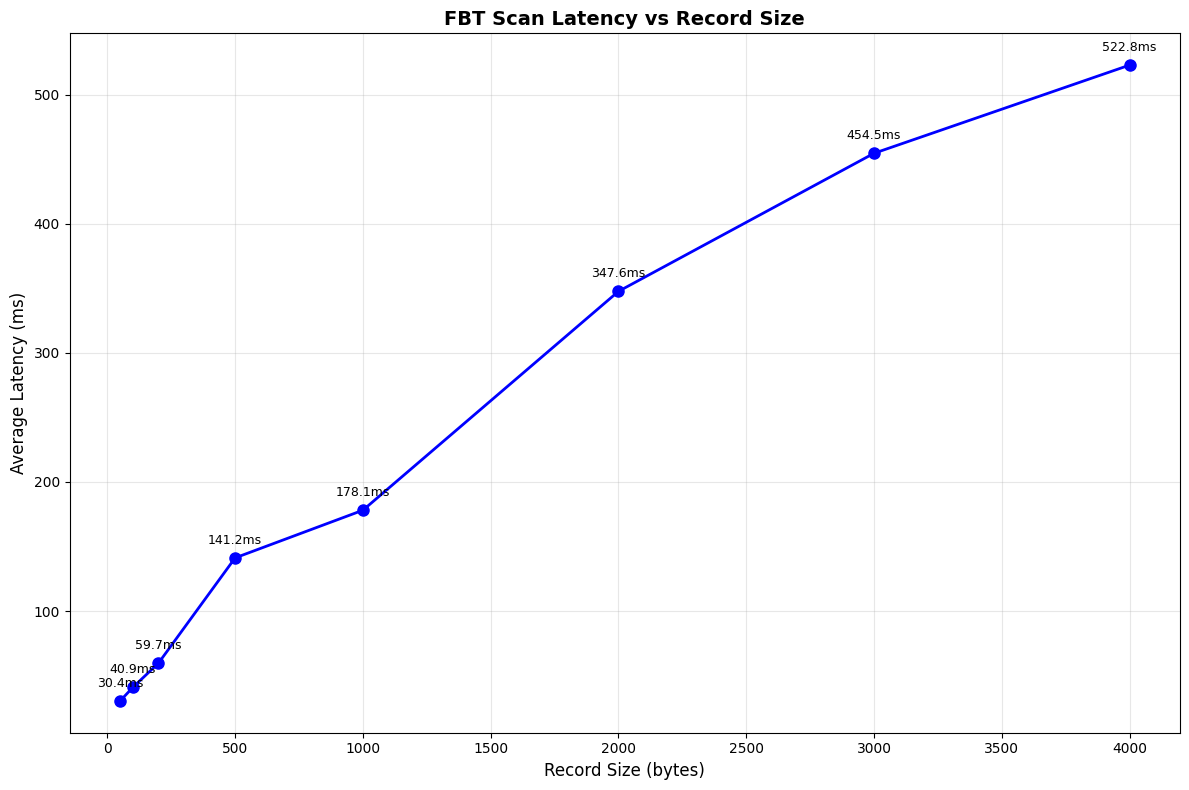

In [74]:
# Create the plot
plt.figure(figsize=(12, 8))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('FBT Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

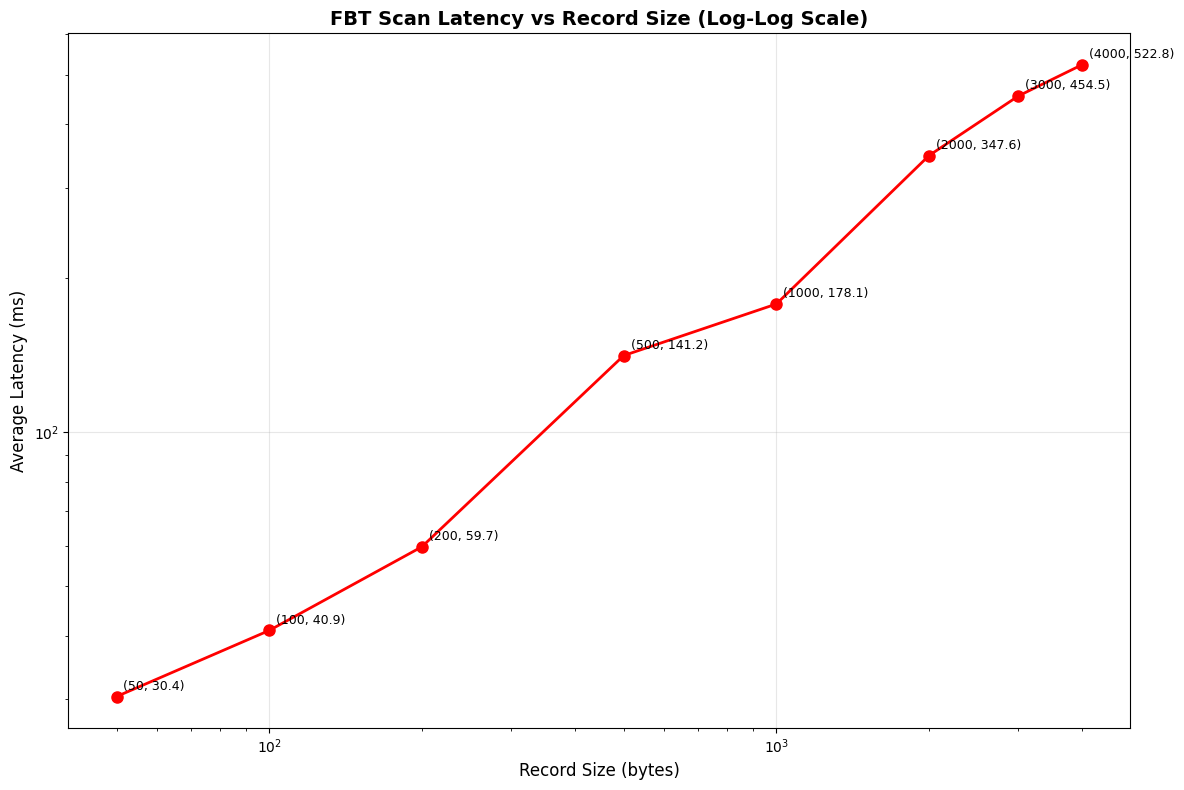

In [75]:
# Create a log-scale version for better visualization if there's a wide range
plt.figure(figsize=(12, 8))
plt.loglog(record_sizes, avg_latencies, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('FBT Scan Latency vs Record Size (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

plt.tight_layout()
plt.show()

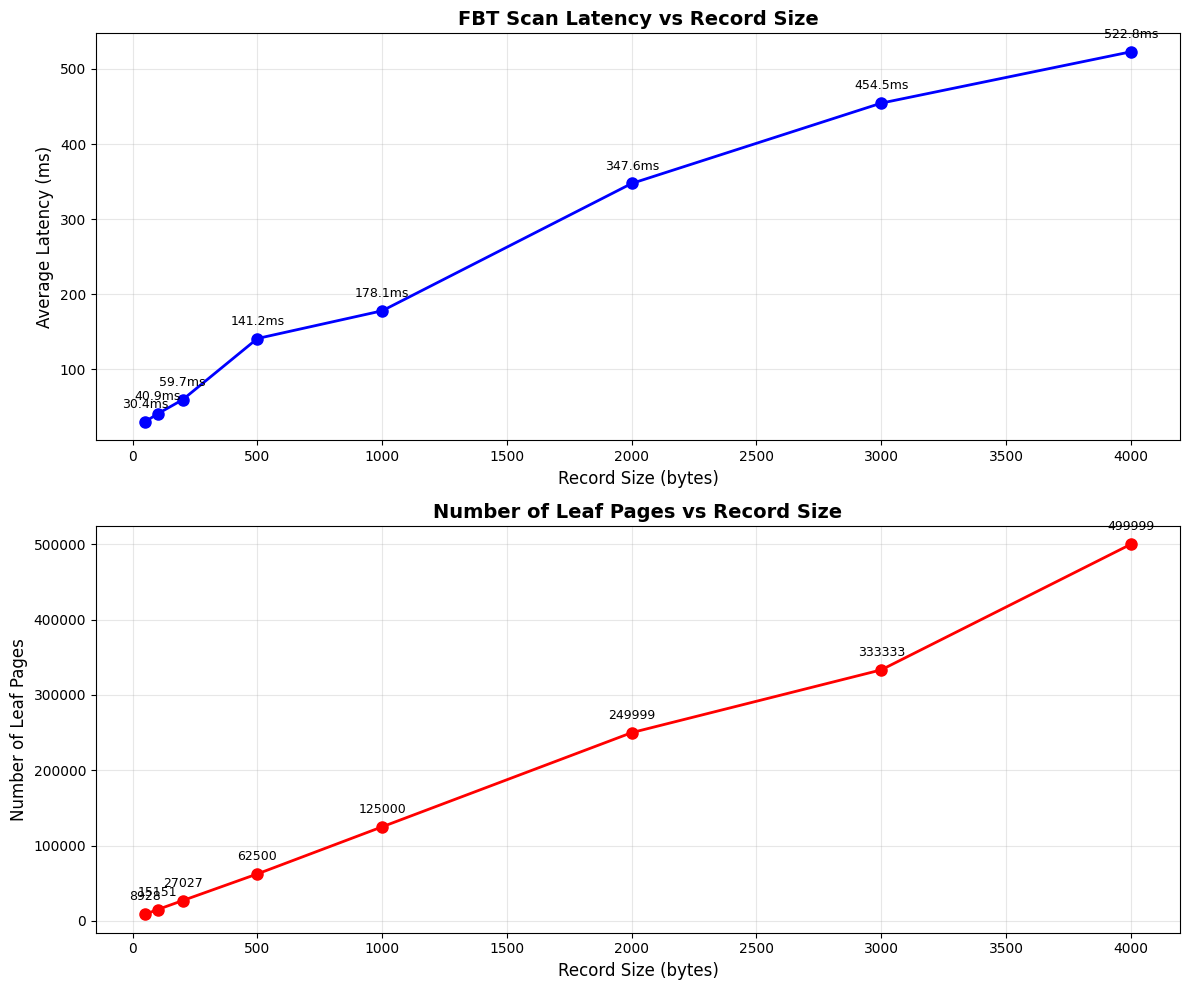

In [76]:
# Create a subplot showing both latency and leaf page count
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Latency vs Record Size
ax1.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Record Size (bytes)', fontsize=12)
ax1.set_ylabel('Average Latency (ms)', fontsize=12)
ax1.set_title('FBT Scan Latency vs Record Size', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(record_sizes, avg_latencies):
    ax1.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

# Plot 2: Leaf Pages vs Record Size
ax2.plot(record_sizes, leaf_pages, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Record Size (bytes)', fontsize=12)
ax2.set_ylabel('Number of Leaf Pages', fontsize=12)
ax2.set_title('Number of Leaf Pages vs Record Size', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lp in zip(record_sizes, leaf_pages):
    ax2.annotate(f'{lp}', (rs, lp), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

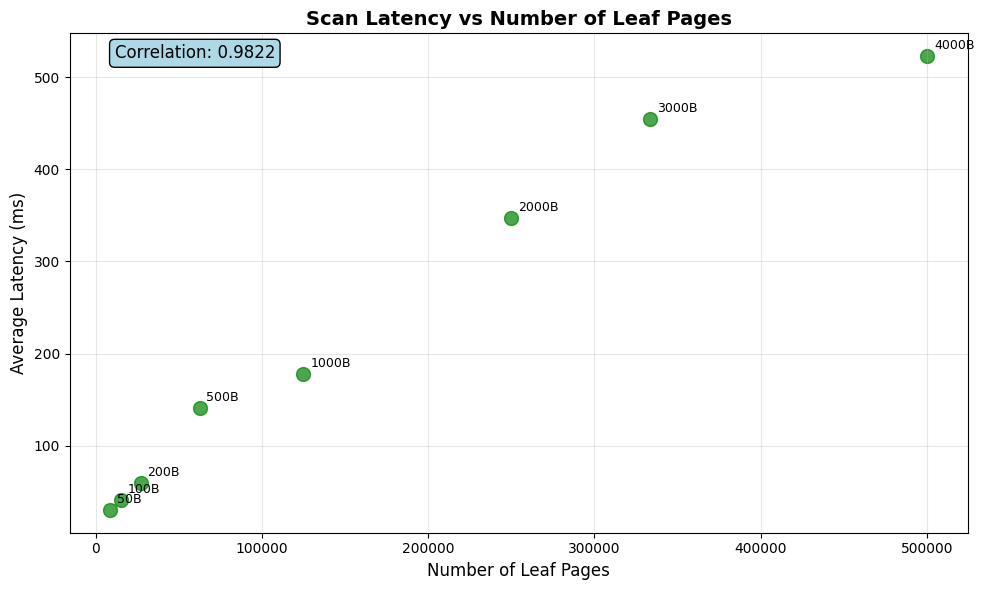

In [77]:
# Plot correlation between leaf pages and latency
plt.figure(figsize=(10, 6))
plt.scatter(leaf_pages, avg_latencies, c='green', s=100, alpha=0.7)
plt.xlabel('Number of Leaf Pages', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency vs Number of Leaf Pages', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add record size labels for each point
for rs, lp, lat in zip(record_sizes, leaf_pages, avg_latencies):
    plt.annotate(f'{rs}B', (lp, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

# Calculate and display correlation
if len(leaf_pages) > 1:
    correlation = np.corrcoef(leaf_pages, avg_latencies)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {correlation:.4f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.tight_layout()
plt.show()

In [78]:
# Print summary statistics
if data:
    print("Summary Statistics:")
    print(f"Record size range: {min(record_sizes)} - {max(record_sizes)} bytes")
    print(f"Latency range: {min(avg_latencies):.2f} - {max(avg_latencies):.2f} ms")
    print(f"Leaf pages range: {min(leaf_pages)} - {max(leaf_pages)} pages")
    print(f"Average latency: {np.mean(avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(avg_latencies):.2f} ms")
    print(f"Average leaf pages: {np.mean(leaf_pages):.0f} pages")
    print(f"Median leaf pages: {np.median(leaf_pages):.0f} pages")
    
    # Calculate correlation coefficients
    if len(data) > 1:
        latency_recordsize_corr = np.corrcoef(record_sizes, avg_latencies)[0, 1]
        leafpages_recordsize_corr = np.corrcoef(record_sizes, leaf_pages)[0, 1]
        latency_leafpages_corr = np.corrcoef(leaf_pages, avg_latencies)[0, 1]
        
        print(f"\nCorrelations:")
        print(f"Latency vs Record Size: {latency_recordsize_corr:.4f}")
        print(f"Leaf Pages vs Record Size: {leafpages_recordsize_corr:.4f}")
        print(f"Latency vs Leaf Pages: {latency_leafpages_corr:.4f}")

Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 30.39 - 522.77 ms
Leaf pages range: 8928 - 499999 pages
Average latency: 221.88 ms
Median latency: 159.62 ms
Average leaf pages: 165242 pages
Median leaf pages: 93750 pages

Correlations:
Latency vs Record Size: 0.9890
Leaf Pages vs Record Size: 0.9973
Latency vs Leaf Pages: 0.9822


# HS (Heap Store) Scan Latency Analysis

This section analyzes the scan latency performance of the Heap Store access method.

In [79]:
def parse_hs_latency_files():
    """Parse all hs_scan_latency_*.txt files and extract record size, average latency, and page count."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('hs_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'hs_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency and page count
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line
            latency_match = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            
            # Find the page count 
            page_match = re.search(r'Page Created: (\d+)', content)
            
            if latency_match and page_match:
                avg_latency = float(latency_match.group(1))
                pages = int(page_match.group(1))
                data.append((record_size, avg_latency, pages))
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms, Pages: {pages}")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [80]:
# Parse the HS data
hs_data = parse_hs_latency_files()

if not hs_data:
    print("No HS data found! Make sure the hs_scan_latency_*.txt files are in the current directory.")
else:
    hs_record_sizes, hs_avg_latencies, hs_pages = zip(*hs_data)
    print(f"\nFound {len(hs_data)} HS data points")
    print(f"Record sizes: {hs_record_sizes}")
    print(f"Average latencies: {hs_avg_latencies}")
    print(f"Pages: {hs_pages}")

Record size: 2000, Avg latency: 220.188403ms, Pages: 125001
Record size: 3000, Avg latency: 357.89919ms, Pages: 200001
Record size: 1000, Avg latency: 141.298323ms, Pages: 62501
Record size: 200, Avg latency: 43.216327ms, Pages: 13700
Record size: 500, Avg latency: 110.344646ms, Pages: 32260
Record size: 4000, Avg latency: 379.736778ms, Pages: 250001
Record size: 100, Avg latency: 25.109536ms, Pages: 7464
Record size: 50, Avg latency: 21.199888ms, Pages: 4407

Found 8 HS data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (21.199888, 25.109536, 43.216327, 110.344646, 141.298323, 220.188403, 357.89919, 379.736778)
Pages: (4407, 7464, 13700, 32260, 62501, 125001, 200001, 250001)


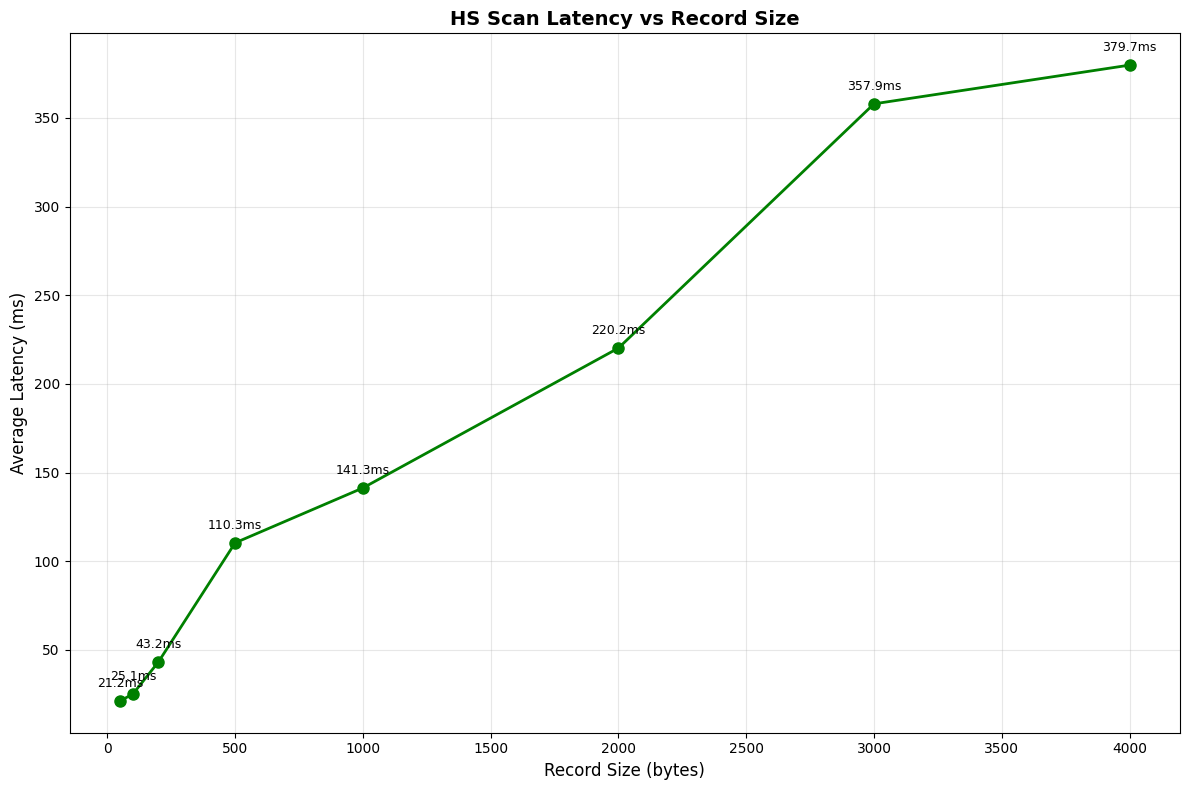

In [81]:
# Create HS scan latency plot
plt.figure(figsize=(12, 8))
plt.plot(hs_record_sizes, hs_avg_latencies, 'go-', linewidth=2, markersize=8, label='HS')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('HS Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

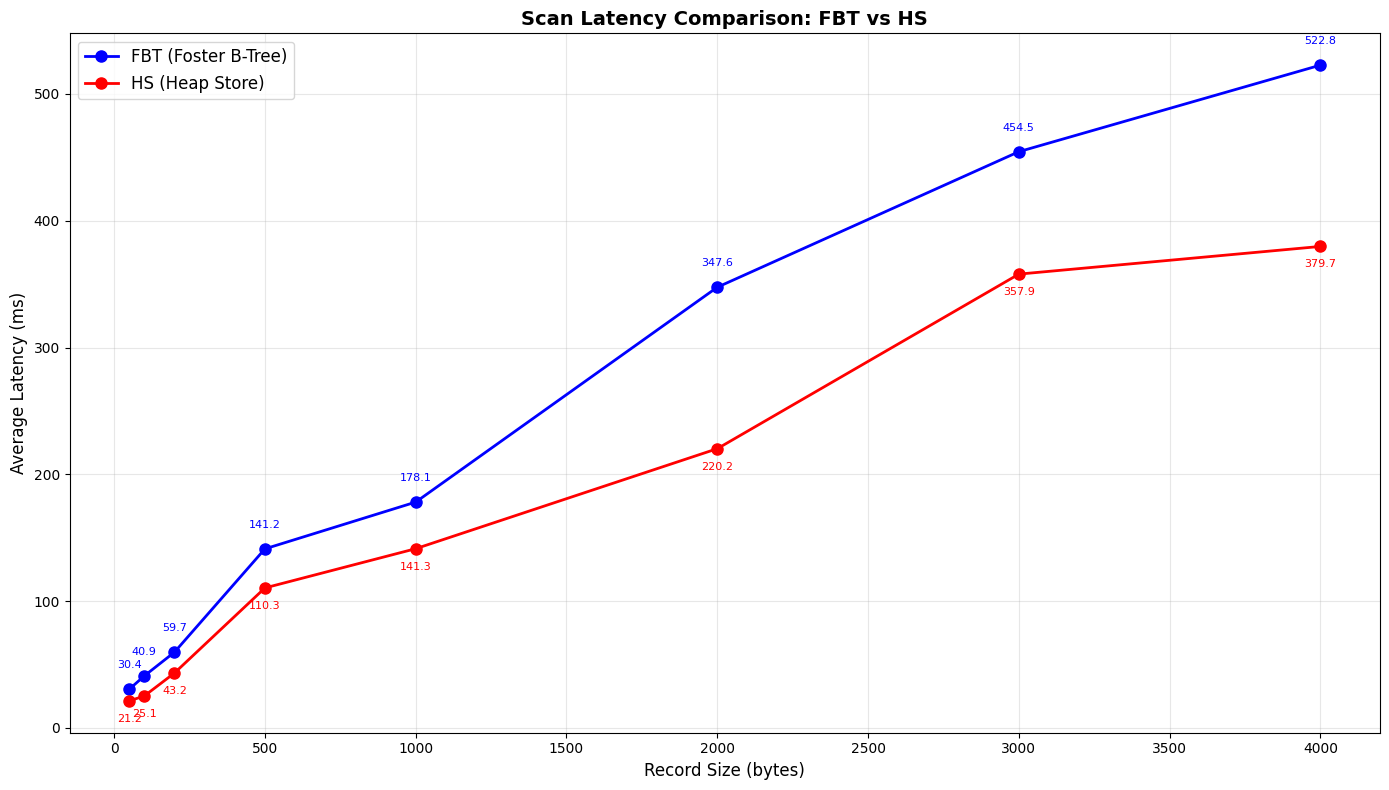

In [82]:
# Compare FBT vs HS scan latency
plt.figure(figsize=(14, 8))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.plot(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on FBT points
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=8, color='blue')

# Add value labels on HS points
for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

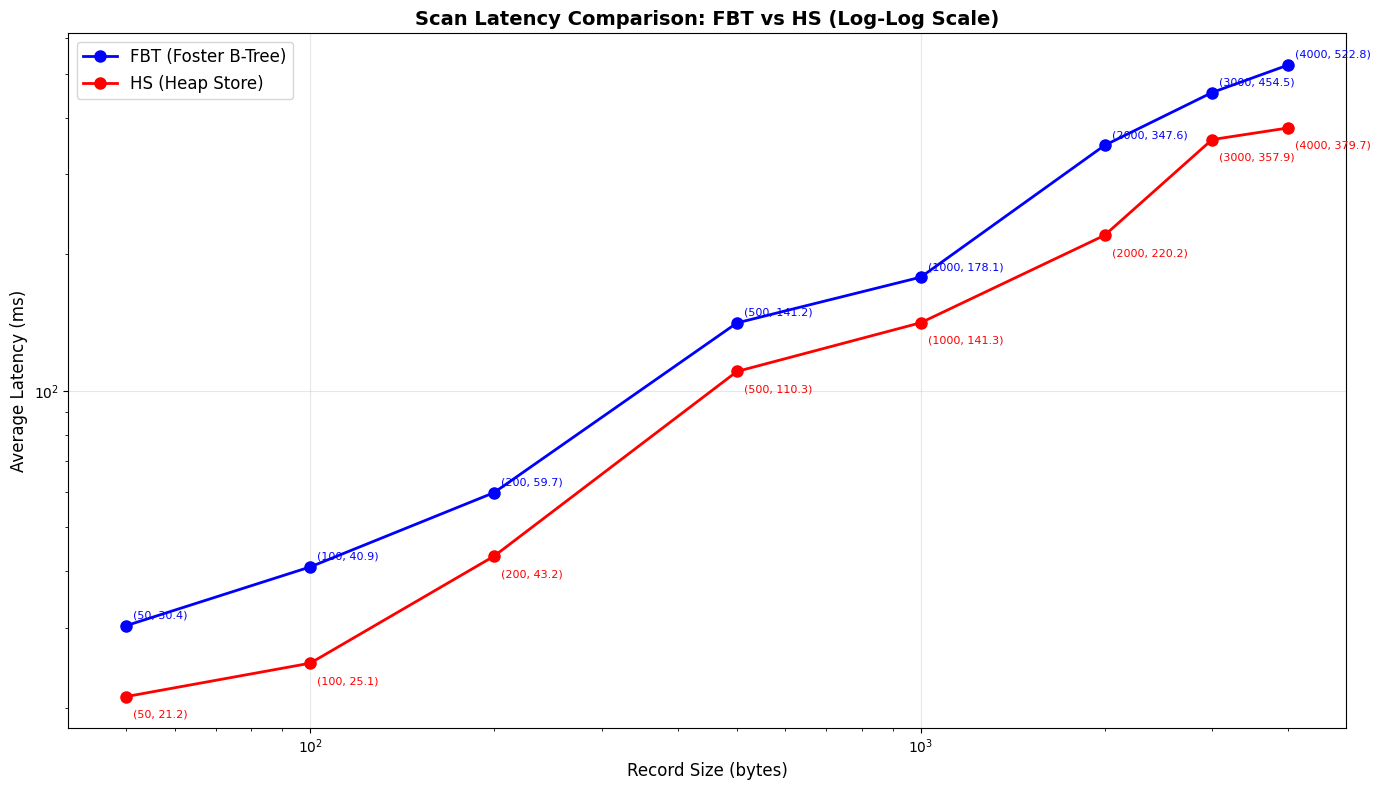

In [83]:
# Log-scale comparison
plt.figure(figsize=(14, 8))
plt.loglog(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.loglog(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on FBT points
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=8, color='blue')

# Add value labels on HS points
for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,-15), ha='left', fontsize=8, color='red')

plt.tight_layout()
plt.show()

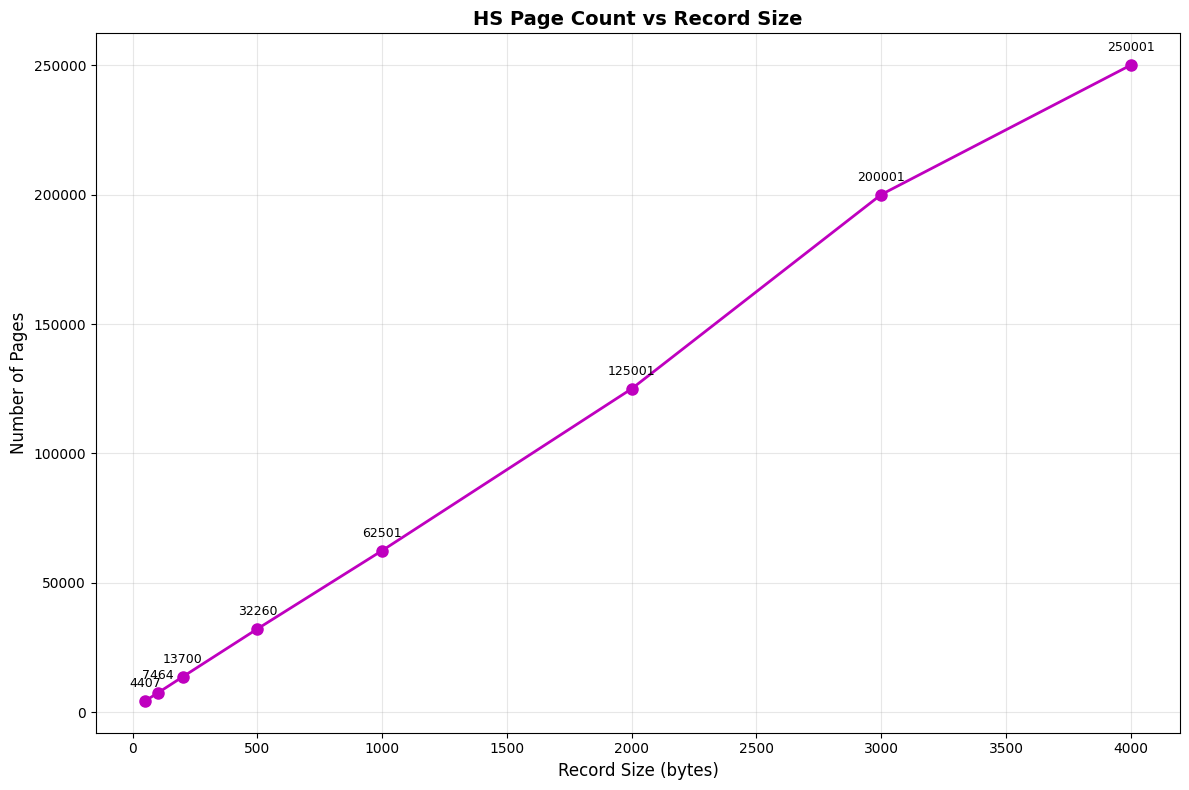

In [84]:
# HS page count analysis
plt.figure(figsize=(12, 8))
plt.plot(hs_record_sizes, hs_pages, 'mo-', linewidth=2, markersize=8)
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('HS Page Count vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, pages in zip(hs_record_sizes, hs_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

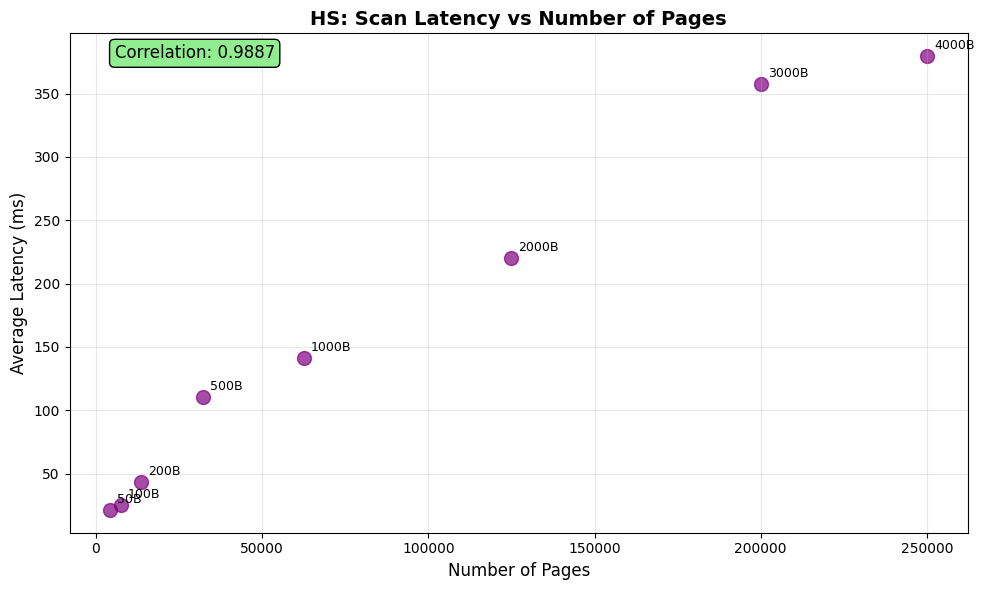

In [85]:
# HS correlation analysis
plt.figure(figsize=(10, 6))
plt.scatter(hs_pages, hs_avg_latencies, c='purple', s=100, alpha=0.7)
plt.xlabel('Number of Pages', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('HS: Scan Latency vs Number of Pages', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add record size labels for each point
for rs, pages, lat in zip(hs_record_sizes, hs_pages, hs_avg_latencies):
    plt.annotate(f'{rs}B', (pages, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

# Calculate and display correlation
if len(hs_pages) > 1:
    hs_correlation = np.corrcoef(hs_pages, hs_avg_latencies)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {hs_correlation:.4f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))

plt.tight_layout()
plt.show()

In [86]:
# HS summary statistics and comparison
if hs_data:
    print("HS Summary Statistics:")
    print(f"Record size range: {min(hs_record_sizes)} - {max(hs_record_sizes)} bytes")
    print(f"Latency range: {min(hs_avg_latencies):.2f} - {max(hs_avg_latencies):.2f} ms")
    print(f"Pages range: {min(hs_pages)} - {max(hs_pages)} pages")
    print(f"Average latency: {np.mean(hs_avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(hs_avg_latencies):.2f} ms")
    print(f"Average pages: {np.mean(hs_pages):.0f} pages")
    print(f"Median pages: {np.median(hs_pages):.0f} pages")
    
    # Calculate correlation coefficients
    if len(hs_data) > 1:
        hs_latency_recordsize_corr = np.corrcoef(hs_record_sizes, hs_avg_latencies)[0, 1]
        hs_pages_recordsize_corr = np.corrcoef(hs_record_sizes, hs_pages)[0, 1]
        hs_latency_pages_corr = np.corrcoef(hs_pages, hs_avg_latencies)[0, 1]
        
        print(f"\nHS Correlations:")
        print(f"Latency vs Record Size: {hs_latency_recordsize_corr:.4f}")
        print(f"Pages vs Record Size: {hs_pages_recordsize_corr:.4f}")
        print(f"Latency vs Pages: {hs_latency_pages_corr:.4f}")

# Performance comparison table
if data and hs_data:
    print("\n" + "="*80)
    print("PERFORMANCE COMPARISON: FBT vs HS")
    print("="*80)
    print(f"{'Record Size':<12} {'FBT Latency':<15} {'HS Latency':<15} {'Speedup':<10} {'FBT Pages':<12} {'HS Pages':<12}")
    print("-" * 80)
    
    # Find common record sizes
    common_sizes = set(record_sizes) & set(hs_record_sizes)
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        
        fbt_latency = avg_latencies[fbt_idx]
        hs_latency = hs_avg_latencies[hs_idx]
        speedup = fbt_latency / hs_latency
        
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        
        print(f"{size:<12} {fbt_latency:<15.2f} {hs_latency:<15.2f} {speedup:<10.2f}x {fbt_pages_count:<12} {hs_pages_count:<12}")
    
    print("-" * 80)
    avg_speedup = np.mean([avg_latencies[record_sizes.index(size)] / hs_avg_latencies[hs_record_sizes.index(size)] 
                          for size in common_sizes])
    print(f"Average speedup: {avg_speedup:.2f}x (FBT is {avg_speedup:.2f}x slower than HS)")

HS Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 21.20 - 379.74 ms
Pages range: 4407 - 250001 pages
Average latency: 162.37 ms
Median latency: 125.82 ms
Average pages: 86917 pages
Median pages: 47380 pages

HS Correlations:
Latency vs Record Size: 0.9846
Pages vs Record Size: 0.9991
Latency vs Pages: 0.9887

PERFORMANCE COMPARISON: FBT vs HS
Record Size  FBT Latency     HS Latency      Speedup    FBT Pages    HS Pages    
--------------------------------------------------------------------------------
50           30.39           21.20           1.43      x 8928         4407        
100          40.92           25.11           1.63      x 15151        7464        
200          59.66           43.22           1.38      x 27027        13700       
500          141.17          110.34          1.28      x 62500        32260       
1000         178.07          141.30          1.26      x 125000       62501       
2000         347.56          220.19          1.58     

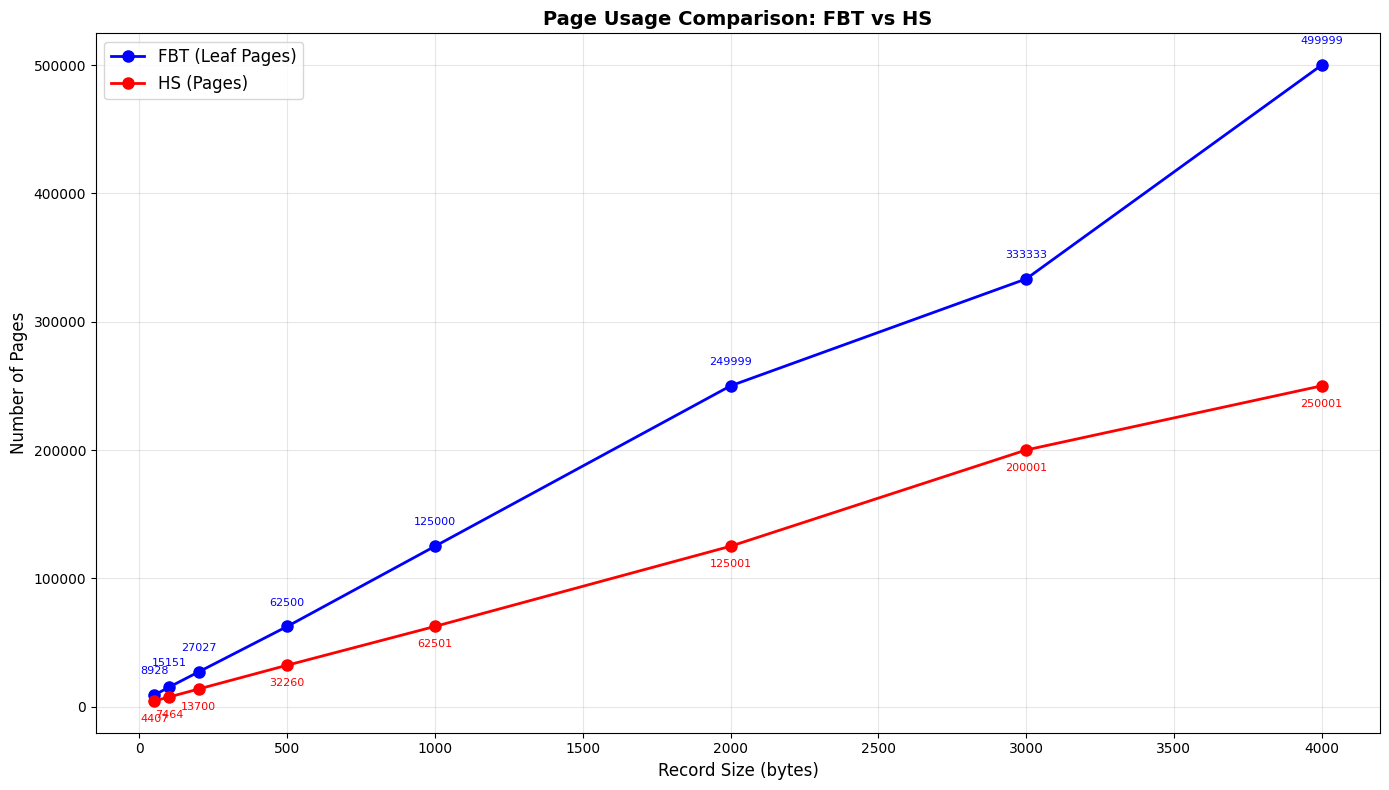

In [87]:
# Compare page usage: FBT (leaf pages) vs HS
plt.figure(figsize=(14, 8))
plt.plot(record_sizes, leaf_pages, 'bo-', linewidth=2, markersize=8, label='FBT (Leaf Pages)')
plt.plot(hs_record_sizes, hs_pages, 'ro-', linewidth=2, markersize=8, label='HS (Pages)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('Page Usage Comparison: FBT vs HS', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on FBT points
for rs, pages in zip(record_sizes, leaf_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=8, color='blue')

# Add value labels on HS points
for rs, pages in zip(hs_record_sizes, hs_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=8, color='red')

plt.tight_layout()
plt.show()

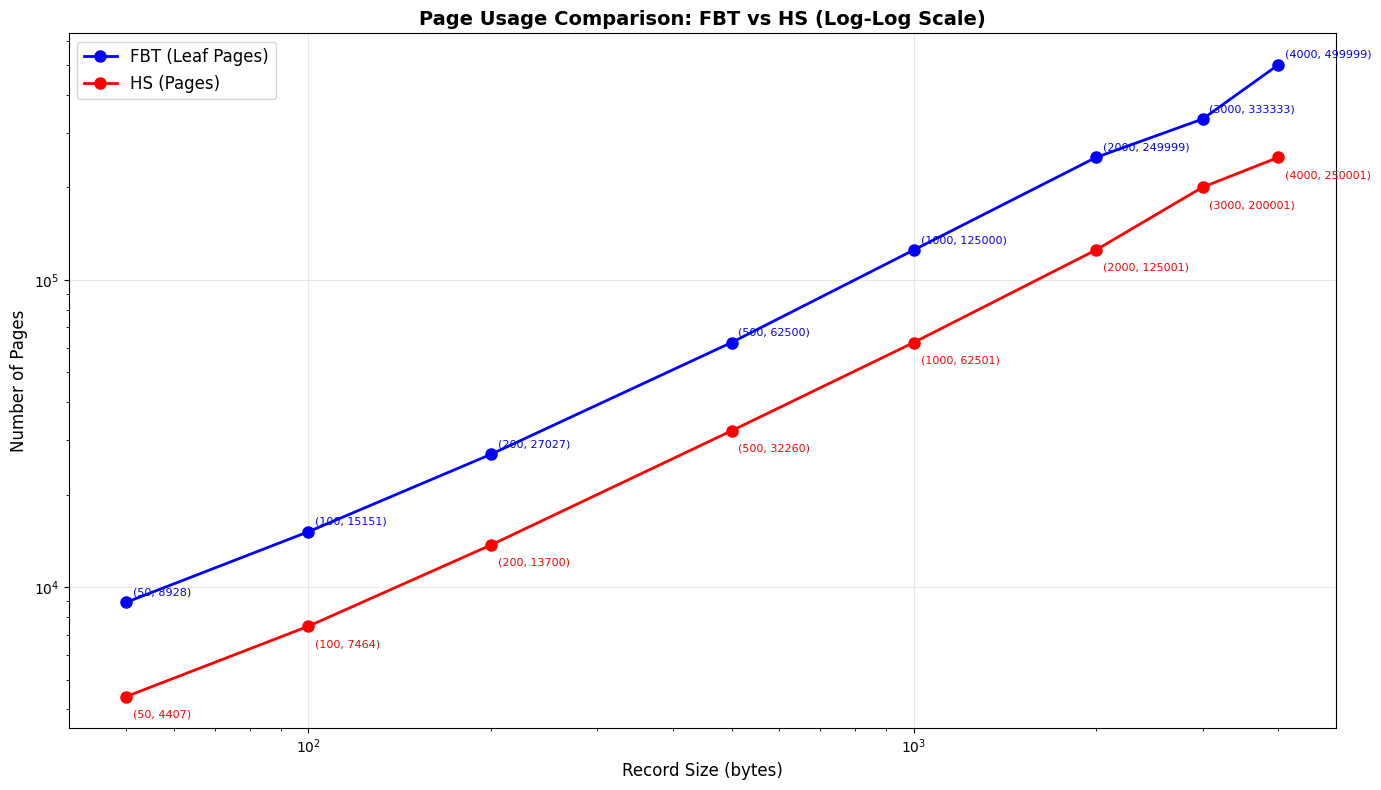

In [88]:
# Log-scale page usage comparison
plt.figure(figsize=(14, 8))
plt.loglog(record_sizes, leaf_pages, 'bo-', linewidth=2, markersize=8, label='FBT (Leaf Pages)')
plt.loglog(hs_record_sizes, hs_pages, 'ro-', linewidth=2, markersize=8, label='HS (Pages)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('Page Usage Comparison: FBT vs HS (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels on FBT points
for rs, pages in zip(record_sizes, leaf_pages):
    plt.annotate(f'({rs}, {pages})', (rs, pages), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=8, color='blue')

# Add value labels on HS points
for rs, pages in zip(hs_record_sizes, hs_pages):
    plt.annotate(f'({rs}, {pages})', (rs, pages), textcoords="offset points", 
                xytext=(5,-15), ha='left', fontsize=8, color='red')

plt.tight_layout()
plt.show()

In [89]:
# Page usage efficiency analysis
if data and hs_data:
    print("PAGE USAGE ANALYSIS")
    print("="*60)
    print(f"{'Record Size':<12} {'FBT Pages':<12} {'HS Pages':<12} {'Page Ratio':<15} {'Space Efficiency'}")
    print("-" * 60)
    
    # Find common record sizes and calculate page usage efficiency
    common_sizes = set(record_sizes) & set(hs_record_sizes)
    page_ratios = []
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        page_ratio = fbt_pages_count / hs_pages_count
        page_ratios.append(page_ratio)
        
        # Calculate space efficiency (lower is better - fewer pages needed)
        efficiency = "HS better" if hs_pages_count < fbt_pages_count else "FBT better"
        
        print(f"{size:<12} {fbt_pages_count:<12} {hs_pages_count:<12} {page_ratio:<15.2f} {efficiency}")
    
    print("-" * 60)
    avg_page_ratio = np.mean(page_ratios)
    print(f"Average page ratio (FBT/HS): {avg_page_ratio:.2f}")
    if avg_page_ratio > 1:
        print(f"FBT uses {avg_page_ratio:.2f}x more pages than HS on average")
    else:
        print(f"HS uses {1/avg_page_ratio:.2f}x more pages than FBT on average")
    
    # Calculate total data stored (assuming 1M records)
    print(f"\nDATA STORAGE ANALYSIS (for 1M records):")
    print("-" * 40)
    for size in sorted(common_sizes):
        total_data_mb = (1000000 * size) / (1024 * 1024)
        print(f"Record size {size}B: {total_data_mb:.1f} MB total data")

PAGE USAGE ANALYSIS
Record Size  FBT Pages    HS Pages     Page Ratio      Space Efficiency
------------------------------------------------------------
50           8928         4407         2.03            HS better
100          15151        7464         2.03            HS better
200          27027        13700        1.97            HS better
500          62500        32260        1.94            HS better
1000         125000       62501        2.00            HS better
2000         249999       125001       2.00            HS better
3000         333333       200001       1.67            HS better
4000         499999       250001       2.00            HS better
------------------------------------------------------------
Average page ratio (FBT/HS): 1.95
FBT uses 1.95x more pages than HS on average

DATA STORAGE ANALYSIS (for 1M records):
----------------------------------------
Record size 50B: 47.7 MB total data
Record size 100B: 95.4 MB total data
Record size 200B: 190.7 MB total

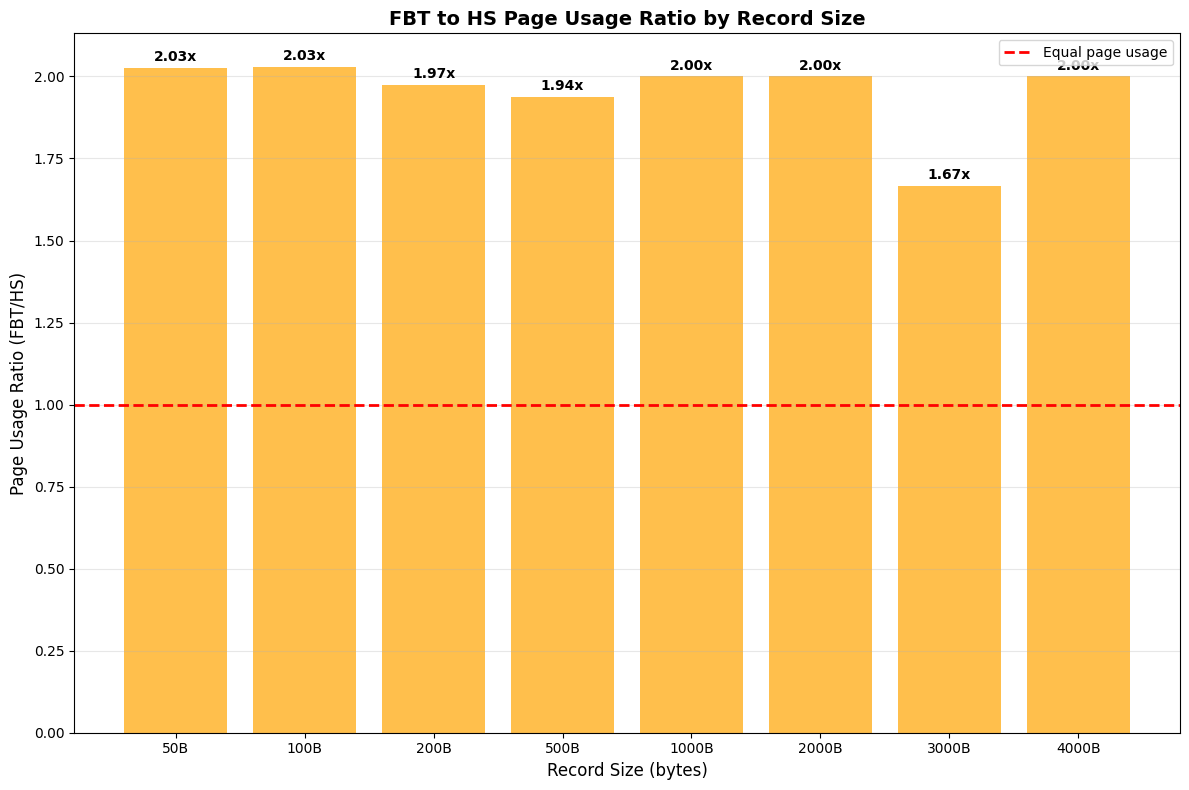


Page Usage Summary:
- Average FBT/HS page ratio: 1.95x
- FBT consistently uses more pages than HS for the same data
- This is expected due to B-tree structure overhead vs. sequential storage


In [90]:
# Page usage ratio visualization
if data and hs_data:
    common_sizes = sorted(set(record_sizes) & set(hs_record_sizes))
    page_ratios = []
    
    for size in common_sizes:
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        page_ratio = fbt_pages_count / hs_pages_count
        page_ratios.append(page_ratio)
    
    plt.figure(figsize=(12, 8))
    bars = plt.bar(range(len(common_sizes)), page_ratios, color='orange', alpha=0.7)
    plt.axhline(y=1, color='red', linestyle='--', linewidth=2, label='Equal page usage')
    plt.xlabel('Record Size (bytes)', fontsize=12)
    plt.ylabel('Page Usage Ratio (FBT/HS)', fontsize=12)
    plt.title('FBT to HS Page Usage Ratio by Record Size', fontsize=14, fontweight='bold')
    plt.xticks(range(len(common_sizes)), [f'{size}B' for size in common_sizes])
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for i, (size, ratio) in enumerate(zip(common_sizes, page_ratios)):
        plt.annotate(f'{ratio:.2f}x', (i, ratio), textcoords="offset points", 
                    xytext=(0,5), ha='center', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Summary text
    avg_ratio = np.mean(page_ratios)
    print(f"\nPage Usage Summary:")
    print(f"- Average FBT/HS page ratio: {avg_ratio:.2f}x")
    print(f"- FBT consistently uses more pages than HS for the same data")
    print(f"- This is expected due to B-tree structure overhead vs. sequential storage")

# APS (Append Only Store) Scan Latency Analysis

This section analyzes the scan latency performance of the Append Only Store access method.

In [91]:
def parse_aps_latency_files():
    """Parse all aps_scan_latency_*.txt files and extract record size, average latency, and page count."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('aps_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'aps_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency and page count
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line
            latency_match = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            
            # Find the page count 
            page_match = re.search(r'Page Created: (\d+)', content)
            
            if latency_match and page_match:
                avg_latency = float(latency_match.group(1))
                pages = int(page_match.group(1))
                data.append((record_size, avg_latency, pages))
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms, Pages: {pages}")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [92]:
# Parse the APS data
aps_data = parse_aps_latency_files()

if not aps_data:
    print("No APS data found! Make sure the aps_scan_latency_*.txt files are in the current directory.")
else:
    aps_record_sizes, aps_avg_latencies, aps_pages = zip(*aps_data)
    print(f"\nFound {len(aps_data)} APS data points")
    print(f"Record sizes: {aps_record_sizes}")
    print(f"Average latencies: {aps_avg_latencies}")
    print(f"Pages: {aps_pages}")

Record size: 50, Avg latency: 19.946144ms, Pages: 4168
Record size: 200, Avg latency: 23.679763ms, Pages: 13335
Record size: 3000, Avg latency: 279.692866ms, Pages: 200001
Record size: 100, Avg latency: 22.272865ms, Pages: 7248
Record size: 500, Avg latency: 40.822497ms, Pages: 32260
Record size: 1000, Avg latency: 110.381617ms, Pages: 62501
Record size: 2000, Avg latency: 200.173185ms, Pages: 125001
Record size: 4000, Avg latency: 296.498654ms, Pages: 250001

Found 8 APS data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (19.946144, 22.272865, 23.679763, 40.822497, 110.381617, 200.173185, 279.692866, 296.498654)
Pages: (4168, 7248, 13335, 32260, 62501, 125001, 200001, 250001)


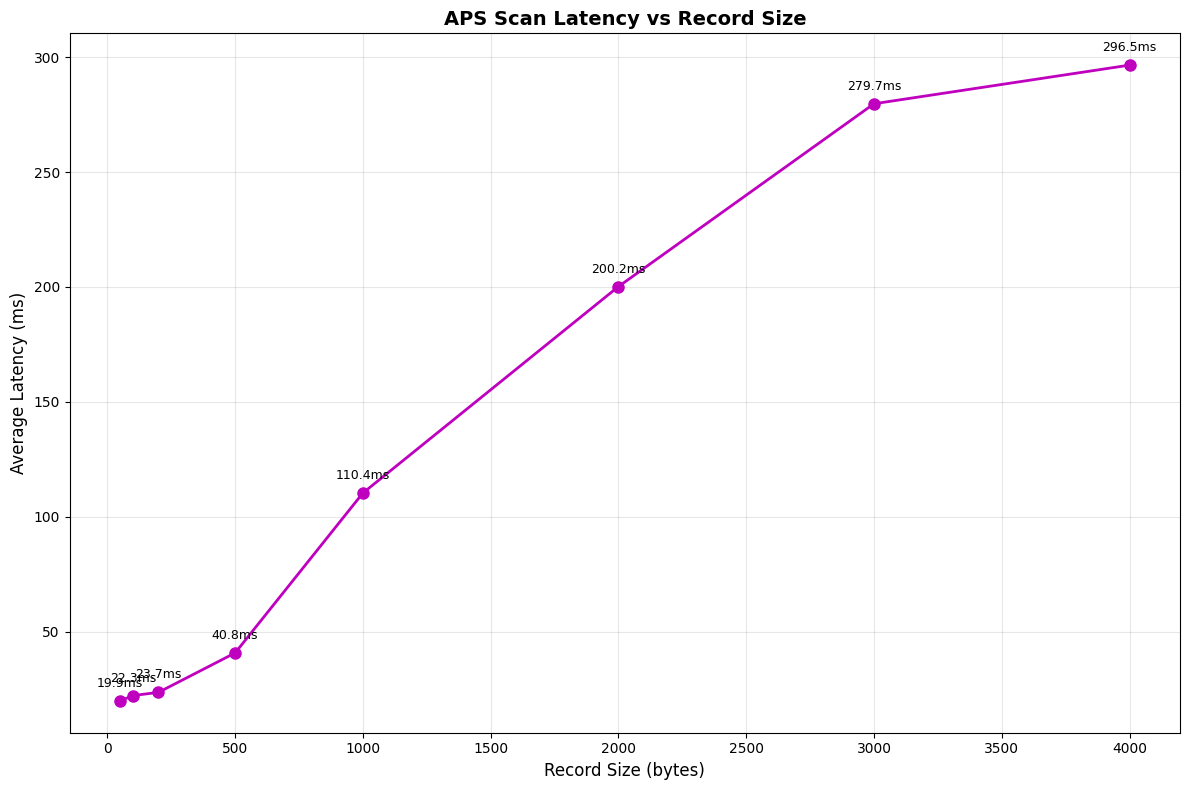

In [93]:
# Create APS scan latency plot
plt.figure(figsize=(12, 8))
plt.plot(aps_record_sizes, aps_avg_latencies, 'mo-', linewidth=2, markersize=8, label='APS')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('APS Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(aps_record_sizes, aps_avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

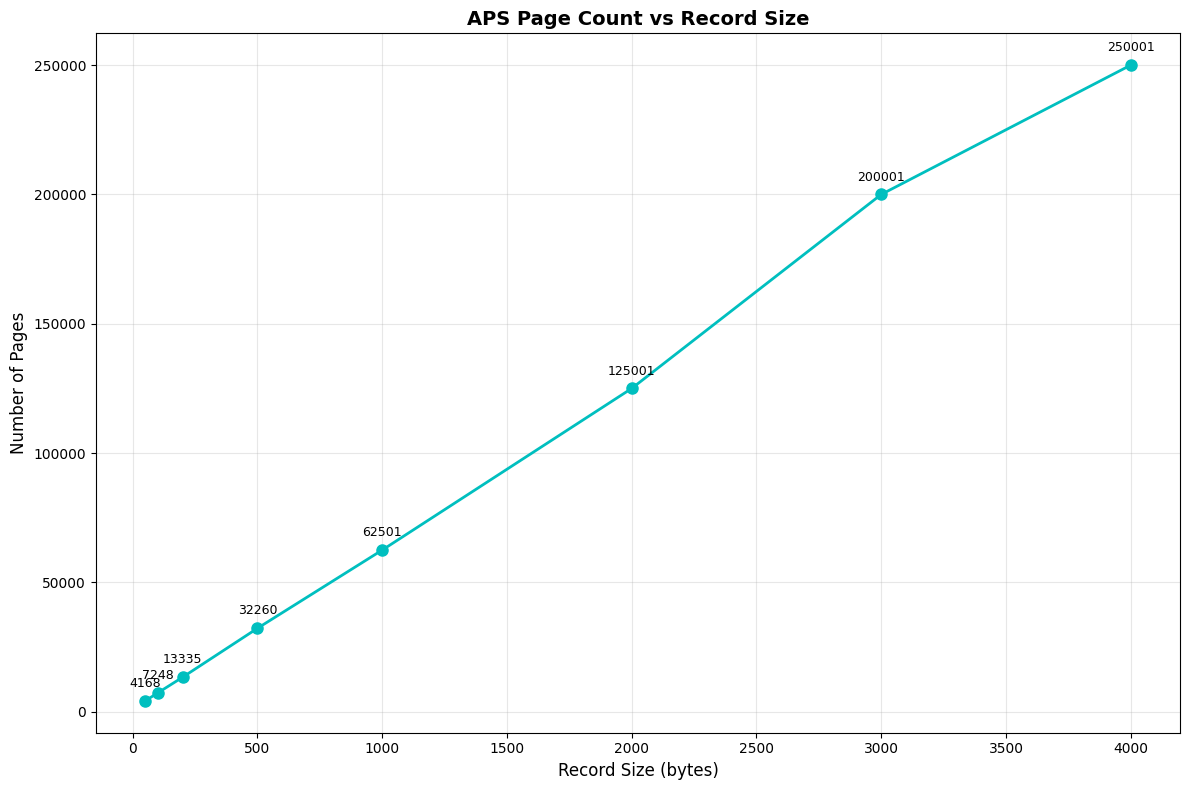

In [94]:
# APS page count analysis
plt.figure(figsize=(12, 8))
plt.plot(aps_record_sizes, aps_pages, 'co-', linewidth=2, markersize=8)
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('APS Page Count vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, pages in zip(aps_record_sizes, aps_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

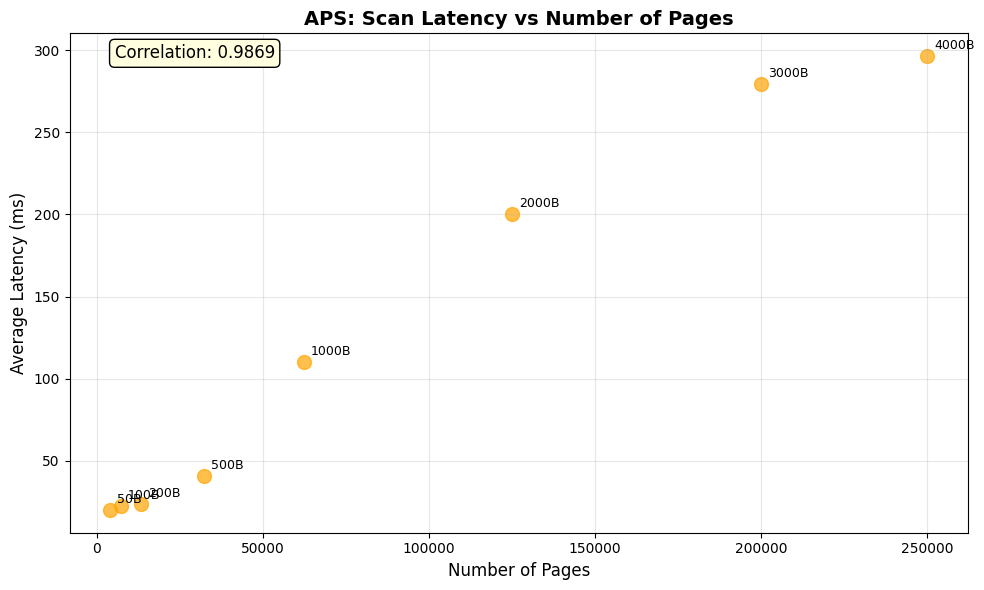

In [95]:
# APS correlation analysis
plt.figure(figsize=(10, 6))
plt.scatter(aps_pages, aps_avg_latencies, c='orange', s=100, alpha=0.7)
plt.xlabel('Number of Pages', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('APS: Scan Latency vs Number of Pages', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add record size labels for each point
for rs, pages, lat in zip(aps_record_sizes, aps_pages, aps_avg_latencies):
    plt.annotate(f'{rs}B', (pages, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

# Calculate and display correlation
if len(aps_pages) > 1:
    aps_correlation = np.corrcoef(aps_pages, aps_avg_latencies)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {aps_correlation:.4f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightyellow"))

plt.tight_layout()
plt.show()

# Three-Way Comparison: FBT vs HS vs APS

This section compares the scan latency performance across all three access methods.

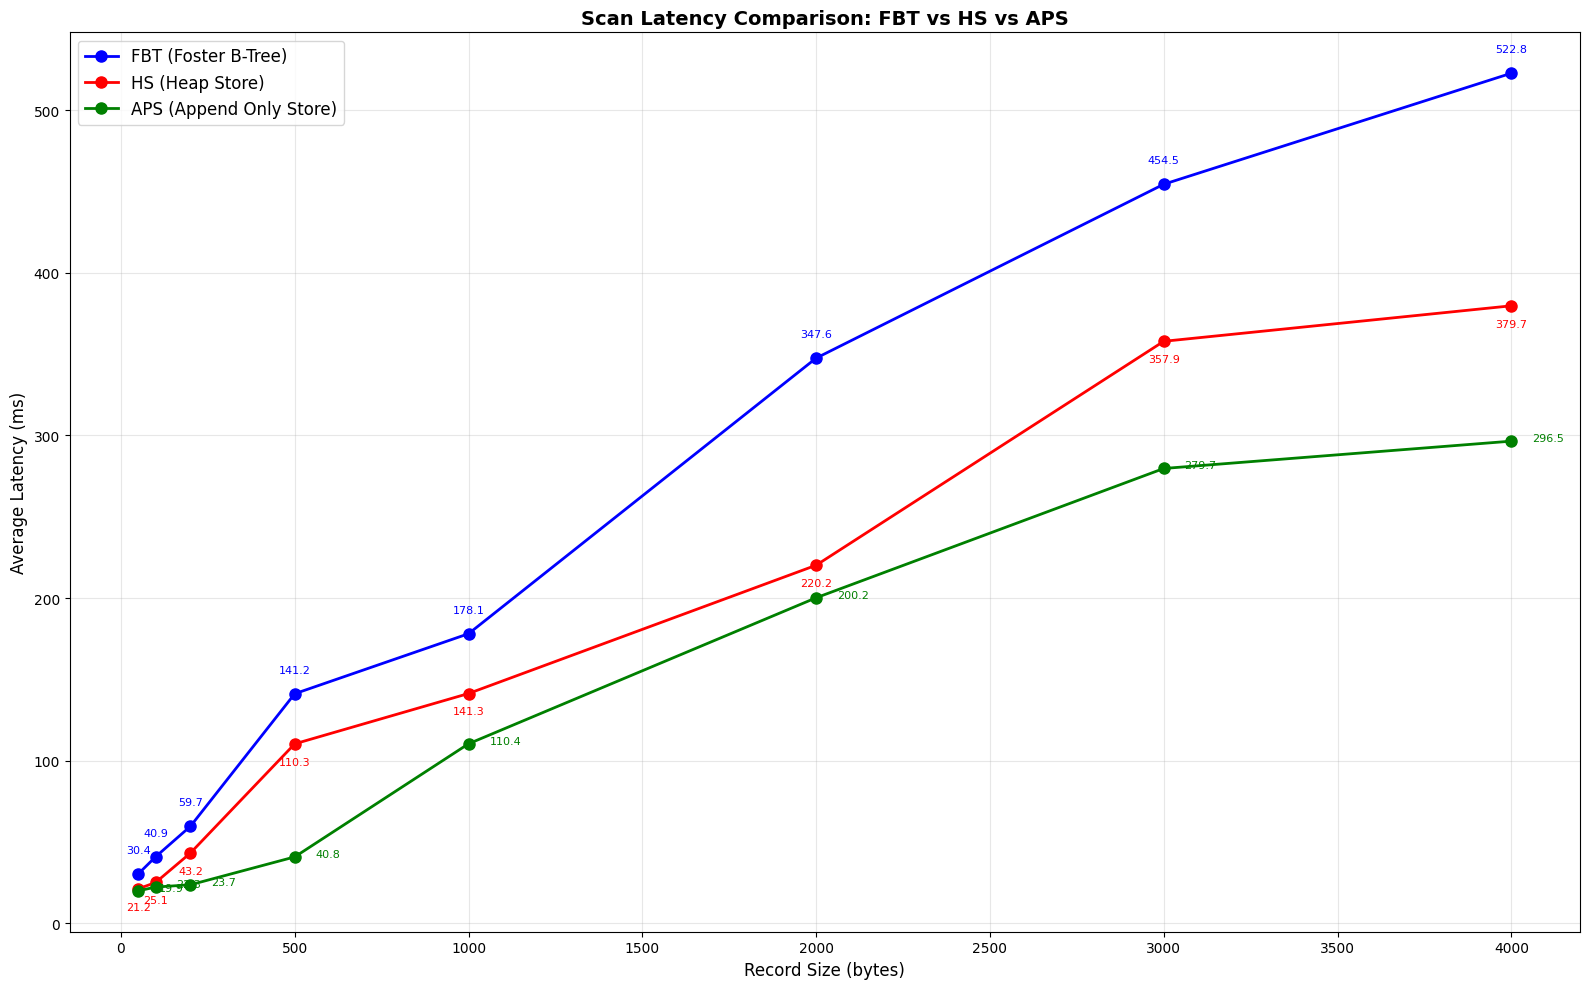

In [96]:
# Three-way scan latency comparison
plt.figure(figsize=(16, 10))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.plot(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.plot(aps_record_sizes, aps_avg_latencies, 'go-', linewidth=2, markersize=8, label='APS (Append Only Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS vs APS', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=8, color='blue')

for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=8, color='red')

for rs, lat in zip(aps_record_sizes, aps_avg_latencies):
    plt.annotate(f'{lat:.1f}', (rs, lat), textcoords="offset points", 
                xytext=(15,0), ha='left', fontsize=8, color='green')

plt.tight_layout()
plt.show()

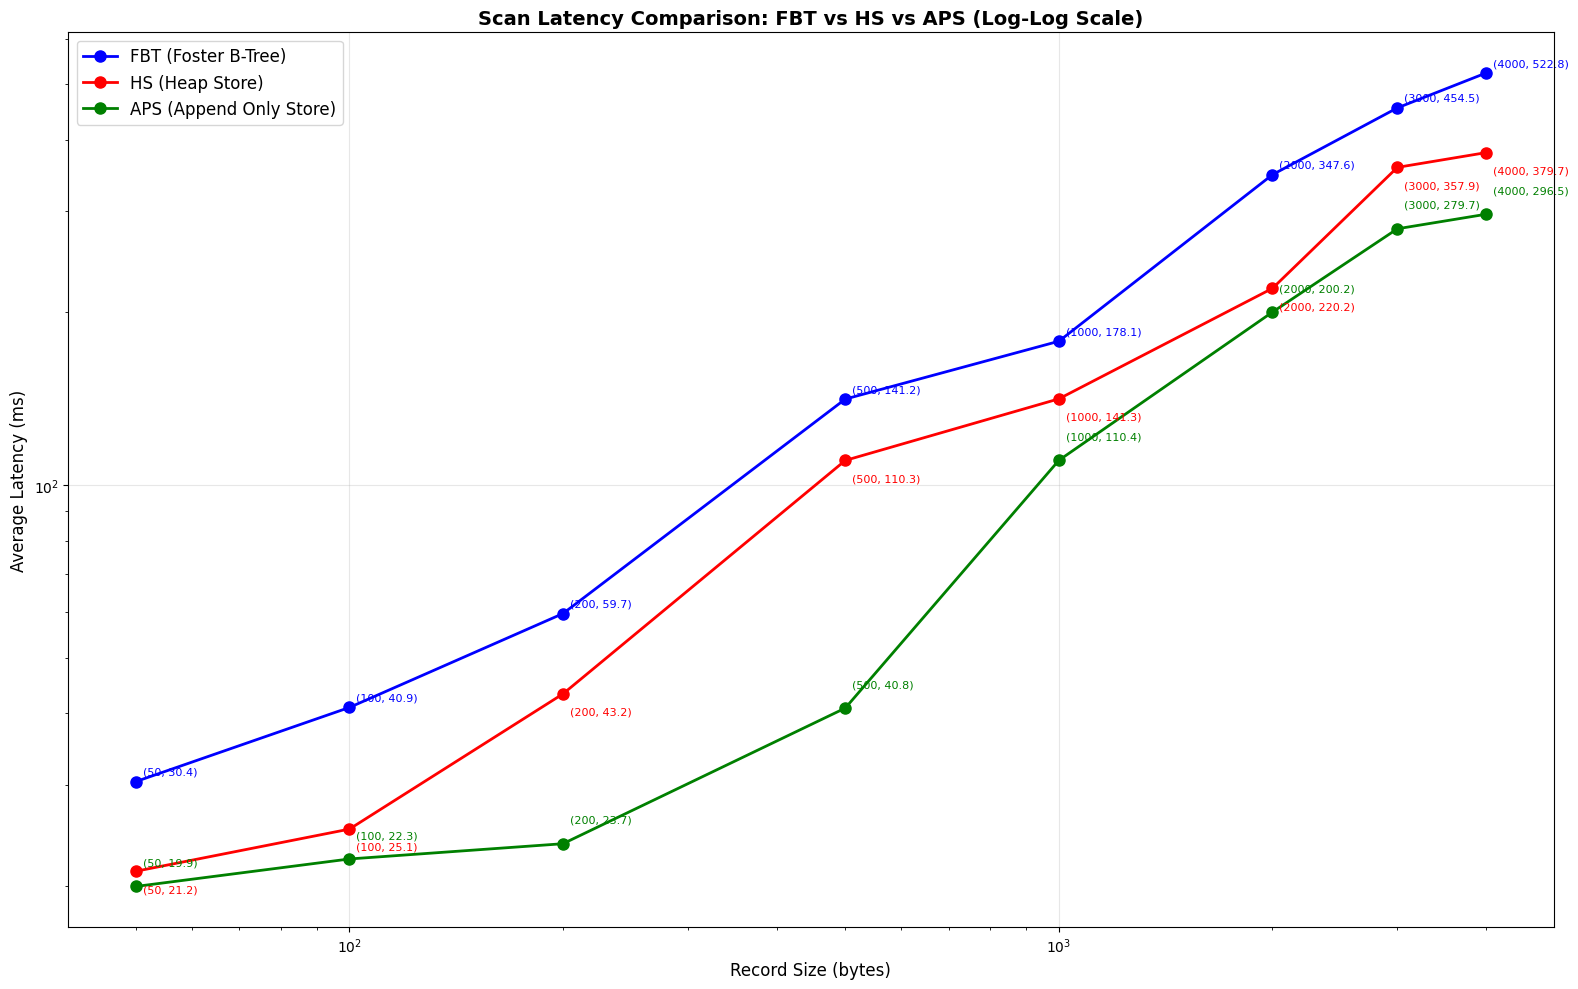

In [97]:
# Log-scale three-way comparison
plt.figure(figsize=(16, 10))
plt.loglog(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.loglog(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.loglog(aps_record_sizes, aps_avg_latencies, 'go-', linewidth=2, markersize=8, label='APS (Append Only Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS vs APS (Log-Log Scale)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for rs, lat in zip(record_sizes, avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=8, color='blue')

for rs, lat in zip(hs_record_sizes, hs_avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,-15), ha='left', fontsize=8, color='red')

for rs, lat in zip(aps_record_sizes, aps_avg_latencies):
    plt.annotate(f'({rs}, {lat:.1f})', (rs, lat), textcoords="offset points", 
                xytext=(5,15), ha='left', fontsize=8, color='green')

plt.tight_layout()
plt.show()

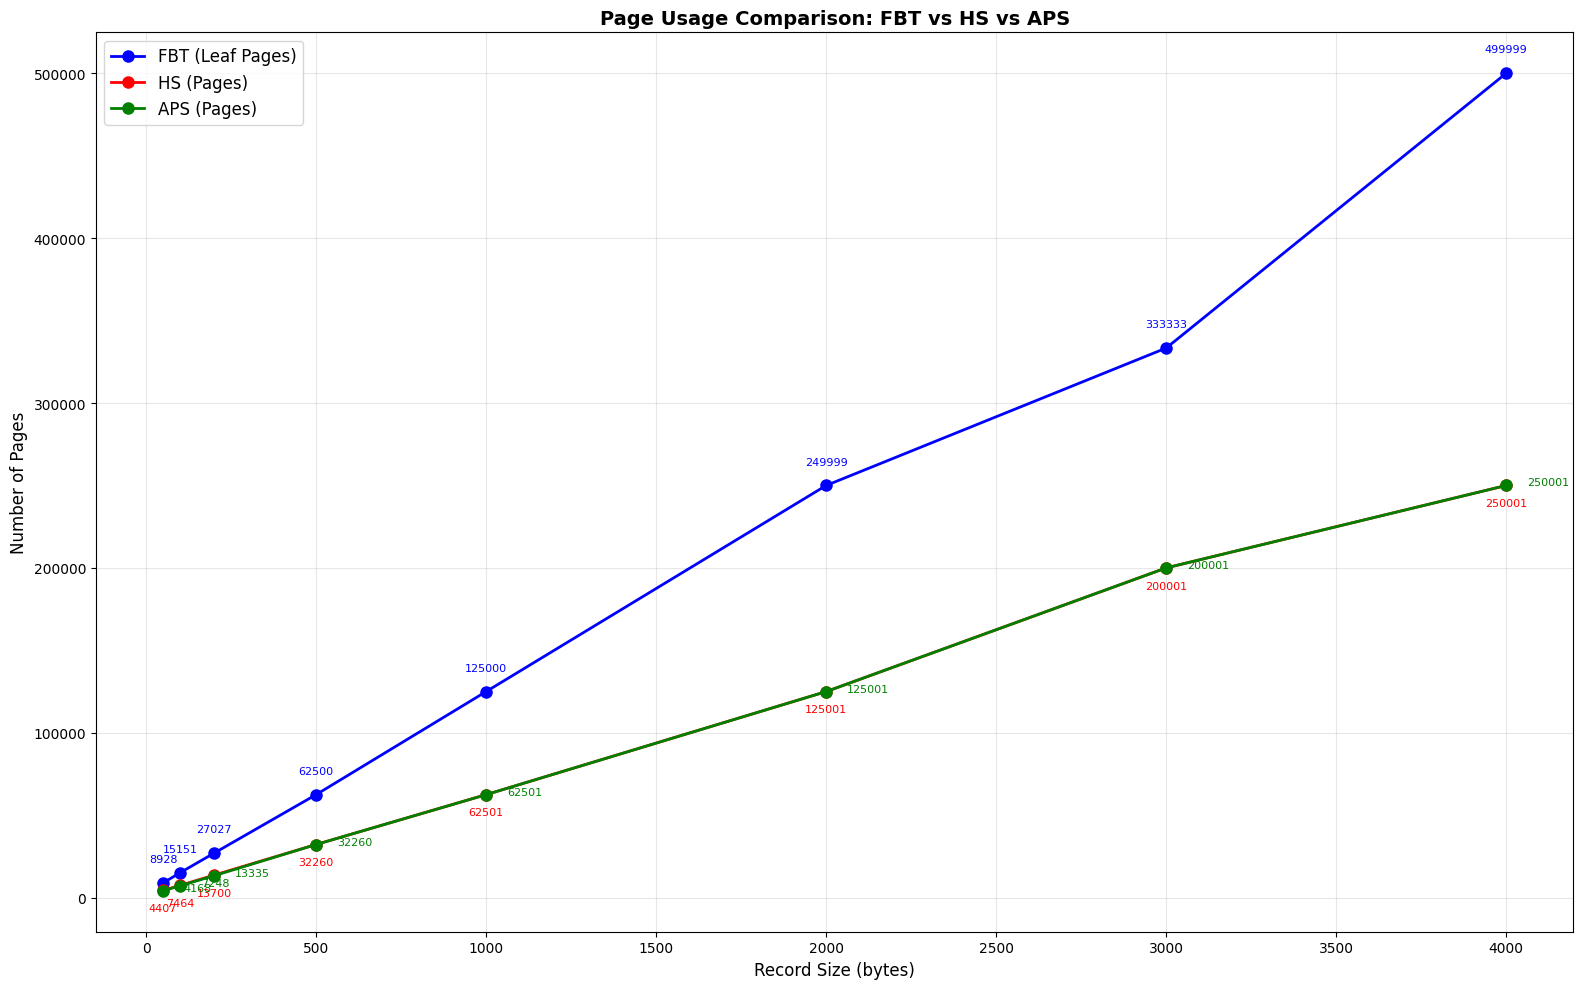

In [98]:
# Three-way page usage comparison
plt.figure(figsize=(16, 10))
plt.plot(record_sizes, leaf_pages, 'bo-', linewidth=2, markersize=8, label='FBT (Leaf Pages)')
plt.plot(hs_record_sizes, hs_pages, 'ro-', linewidth=2, markersize=8, label='HS (Pages)')
plt.plot(aps_record_sizes, aps_pages, 'go-', linewidth=2, markersize=8, label='APS (Pages)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('Page Usage Comparison: FBT vs HS vs APS', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Add value labels
for rs, pages in zip(record_sizes, leaf_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,15), ha='center', fontsize=8, color='blue')

for rs, pages in zip(hs_record_sizes, hs_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(0,-15), ha='center', fontsize=8, color='red')

for rs, pages in zip(aps_record_sizes, aps_pages):
    plt.annotate(f'{pages}', (rs, pages), textcoords="offset points", 
                xytext=(15,0), ha='left', fontsize=8, color='green')

plt.tight_layout()
plt.show()

In [99]:
# Comprehensive performance comparison table
if data and hs_data and aps_data:
    print("COMPREHENSIVE PERFORMANCE COMPARISON")
    print("="*100)
    print(f"{'Record Size':<12} {'FBT Latency':<15} {'HS Latency':<15} {'APS Latency':<15} {'Best':<8} {'FBT/HS':<10} {'FBT/APS':<10}")
    print("-" * 100)
    
    # Find common record sizes across all three
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes)
    
    fbt_hs_speedups = []
    fbt_aps_speedups = []
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        
        fbt_latency = avg_latencies[fbt_idx]
        hs_latency = hs_avg_latencies[hs_idx]
        aps_latency = aps_avg_latencies[aps_idx]
        
        # Determine the best performer
        best_latency = min(fbt_latency, hs_latency, aps_latency)
        if best_latency == fbt_latency:
            best = "FBT"
        elif best_latency == hs_latency:
            best = "HS"
        else:
            best = "APS"
        
        fbt_hs_speedup = fbt_latency / hs_latency
        fbt_aps_speedup = fbt_latency / aps_latency
        
        fbt_hs_speedups.append(fbt_hs_speedup)
        fbt_aps_speedups.append(fbt_aps_speedup)
        
        print(f"{size:<12} {fbt_latency:<15.2f} {hs_latency:<15.2f} {aps_latency:<15.2f} {best:<8} {fbt_hs_speedup:<10.2f} {fbt_aps_speedup:<10.2f}")
    
    print("-" * 100)
    avg_fbt_hs_speedup = np.mean(fbt_hs_speedups)
    avg_fbt_aps_speedup = np.mean(fbt_aps_speedups)
    
    print(f"Average FBT/HS ratio: {avg_fbt_hs_speedup:.2f}x")
    print(f"Average FBT/APS ratio: {avg_fbt_aps_speedup:.2f}x")
    
    # Performance ranking summary
    print(f"\nPERFORMANCE RANKING (average latency):")
    methods = [
        ("APS", np.mean([aps_avg_latencies[aps_record_sizes.index(size)] for size in common_sizes])),
        ("HS", np.mean([hs_avg_latencies[hs_record_sizes.index(size)] for size in common_sizes])),
        ("FBT", np.mean([avg_latencies[record_sizes.index(size)] for size in common_sizes]))
    ]
    methods.sort(key=lambda x: x[1])
    
    for i, (method, avg_lat) in enumerate(methods, 1):
        print(f"{i}. {method}: {avg_lat:.2f}ms average")

COMPREHENSIVE PERFORMANCE COMPARISON
Record Size  FBT Latency     HS Latency      APS Latency     Best     FBT/HS     FBT/APS   
----------------------------------------------------------------------------------------------------
50           30.39           21.20           19.95           APS      1.43       1.52      
100          40.92           25.11           22.27           APS      1.63       1.84      
200          59.66           43.22           23.68           APS      1.38       2.52      
500          141.17          110.34          40.82           APS      1.28       3.46      
1000         178.07          141.30          110.38          APS      1.26       1.61      
2000         347.56          220.19          200.17          APS      1.58       1.74      
3000         454.48          357.90          279.69          APS      1.27       1.62      
4000         522.77          379.74          296.50          APS      1.38       1.76      
----------------------------------

In [100]:
# APS summary statistics and correlations
if aps_data:
    print("APS Summary Statistics:")
    print(f"Record size range: {min(aps_record_sizes)} - {max(aps_record_sizes)} bytes")
    print(f"Latency range: {min(aps_avg_latencies):.2f} - {max(aps_avg_latencies):.2f} ms")
    print(f"Pages range: {min(aps_pages)} - {max(aps_pages)} pages")
    print(f"Average latency: {np.mean(aps_avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(aps_avg_latencies):.2f} ms")
    print(f"Average pages: {np.mean(aps_pages):.0f} pages")
    print(f"Median pages: {np.median(aps_pages):.0f} pages")
    
    # Calculate correlation coefficients
    if len(aps_data) > 1:
        aps_latency_recordsize_corr = np.corrcoef(aps_record_sizes, aps_avg_latencies)[0, 1]
        aps_pages_recordsize_corr = np.corrcoef(aps_record_sizes, aps_pages)[0, 1]
        aps_latency_pages_corr = np.corrcoef(aps_pages, aps_avg_latencies)[0, 1]
        
        print(f"\nAPS Correlations:")
        print(f"Latency vs Record Size: {aps_latency_recordsize_corr:.4f}")
        print(f"Pages vs Record Size: {aps_pages_recordsize_corr:.4f}")
        print(f"Latency vs Pages: {aps_latency_pages_corr:.4f}")

# Page usage efficiency across all three methods
if data and hs_data and aps_data:
    print("\n" + "="*80)
    print("PAGE USAGE EFFICIENCY COMPARISON")
    print("="*80)
    print(f"{'Record Size':<12} {'FBT Pages':<12} {'HS Pages':<12} {'APS Pages':<12} {'Most Efficient'}")
    print("-" * 80)
    
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes)
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        aps_pages_count = aps_pages[aps_idx]
        
        # Determine most page-efficient (fewest pages)
        min_pages = min(fbt_pages_count, hs_pages_count, aps_pages_count)
        if min_pages == fbt_pages_count:
            most_efficient = "FBT"
        elif min_pages == hs_pages_count:
            most_efficient = "HS"
        else:
            most_efficient = "APS"
        
        print(f"{size:<12} {fbt_pages_count:<12} {hs_pages_count:<12} {aps_pages_count:<12} {most_efficient}")
    
    print("-" * 80)

APS Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 19.95 - 296.50 ms
Pages range: 4168 - 250001 pages
Average latency: 124.18 ms
Median latency: 75.60 ms
Average pages: 86814 pages
Median pages: 47380 pages

APS Correlations:
Latency vs Record Size: 0.9838
Pages vs Record Size: 0.9991
Latency vs Pages: 0.9869

PAGE USAGE EFFICIENCY COMPARISON
Record Size  FBT Pages    HS Pages     APS Pages    Most Efficient
--------------------------------------------------------------------------------
50           8928         4407         4168         APS
100          15151        7464         7248         APS
200          27027        13700        13335        APS
500          62500        32260        32260        HS
1000         125000       62501        62501        HS
2000         249999       125001       125001       HS
3000         333333       200001       200001       HS
4000         499999       250001       250001       HS
-----------------------------------------

# FSS (Fixed Size Store) Scan Latency Analysis

This section analyzes the scan latency performance of the Fixed Size Store access method.

In [101]:
def parse_fss_latency_files():
    """Parse all fss_scan_latency_*.txt files and extract record size, average latency, and page count."""
    data = []
    
    # Find all files matching the pattern
    files = glob.glob('fss_scan_latency_*.txt')
    
    for file_path in files:
        # Extract record size from filename
        match = re.search(r'fss_scan_latency_(\d+)\.txt', file_path)
        if not match:
            continue
        
        record_size = int(match.group(1))
        
        # Read the file and extract average latency and page count
        try:
            with open(file_path, 'r') as f:
                content = f.read()
                
            # Find the "Avg Latency" line
            latency_match = re.search(r'Avg Latency: ([0-9.]+)ms', content)
            
            # Find the page count 
            page_match = re.search(r'Page Created: (\d+)', content)
            
            if latency_match and page_match:
                avg_latency = float(latency_match.group(1))
                pages = int(page_match.group(1))
                data.append((record_size, avg_latency, pages))
                print(f"Record size: {record_size}, Avg latency: {avg_latency}ms, Pages: {pages}")
        
        except Exception as e:
            print(f"Error processing {file_path}: {e}")
    
    # Sort by record size
    data.sort(key=lambda x: x[0])
    return data

In [102]:
# Parse the FSS data
fss_data = parse_fss_latency_files()

if not fss_data:
    print("No FSS data found! Make sure the fss_scan_latency_*.txt files are in the current directory.")
else:
    fss_record_sizes, fss_avg_latencies, fss_pages = zip(*fss_data)
    print(f"\nFound {len(fss_data)} FSS data points")
    print(f"Record sizes: {fss_record_sizes}")
    print(f"Average latencies: {fss_avg_latencies}")
    print(f"Pages: {fss_pages}")

Record size: 2000, Avg latency: 209.576037ms, Pages: 125001
Record size: 100, Avg latency: 21.682372ms, Pages: 6758
Record size: 4000, Avg latency: 292.22874ms, Pages: 250001
Record size: 1000, Avg latency: 109.263243ms, Pages: 62501
Record size: 50, Avg latency: 19.601639ms, Pages: 3678
Record size: 200, Avg latency: 28.067648ms, Pages: 12989
Record size: 500, Avg latency: 40.70385ms, Pages: 31251
Record size: 3000, Avg latency: 280.922768ms, Pages: 200001

Found 8 FSS data points
Record sizes: (50, 100, 200, 500, 1000, 2000, 3000, 4000)
Average latencies: (19.601639, 21.682372, 28.067648, 40.70385, 109.263243, 209.576037, 280.922768, 292.22874)
Pages: (3678, 6758, 12989, 31251, 62501, 125001, 200001, 250001)


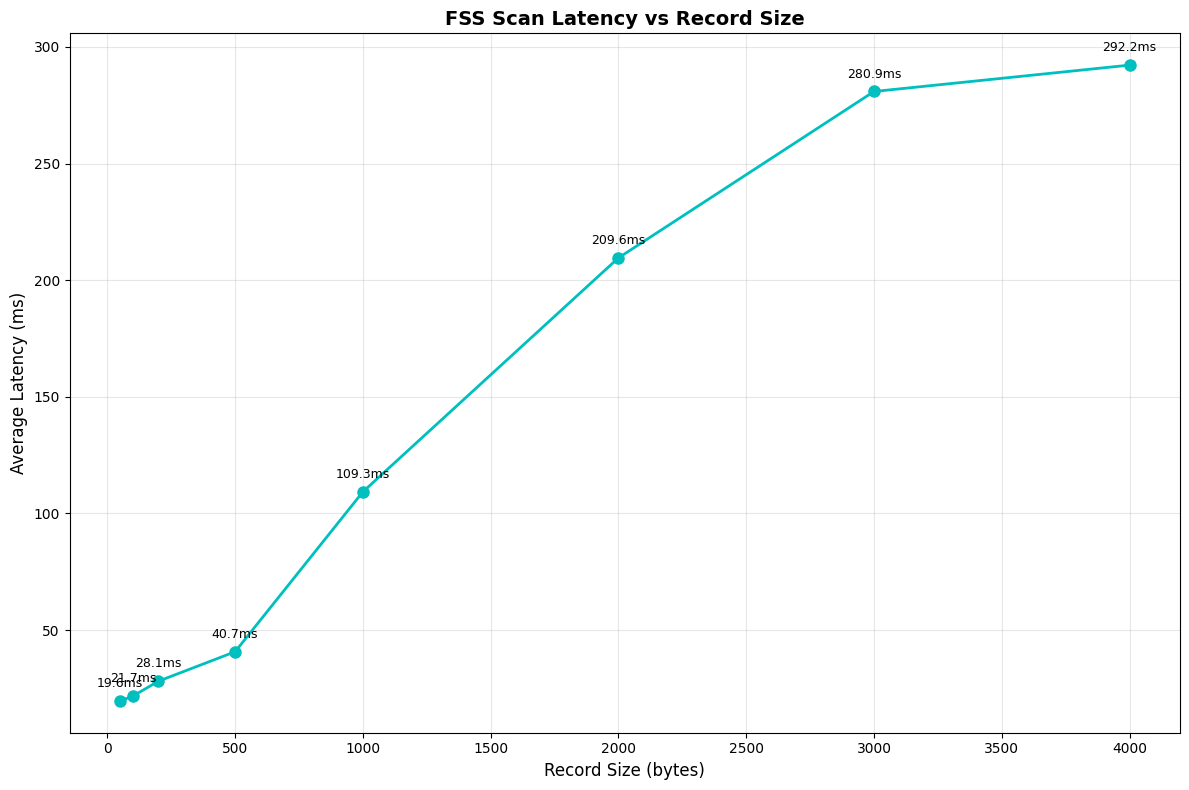

In [103]:
# Create FSS scan latency plot
plt.figure(figsize=(12, 8))
plt.plot(fss_record_sizes, fss_avg_latencies, 'co-', linewidth=2, markersize=8, label='FSS')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('FSS Scan Latency vs Record Size', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add value labels on each point
for rs, lat in zip(fss_record_sizes, fss_avg_latencies):
    plt.annotate(f'{lat:.1f}ms', (rs, lat), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

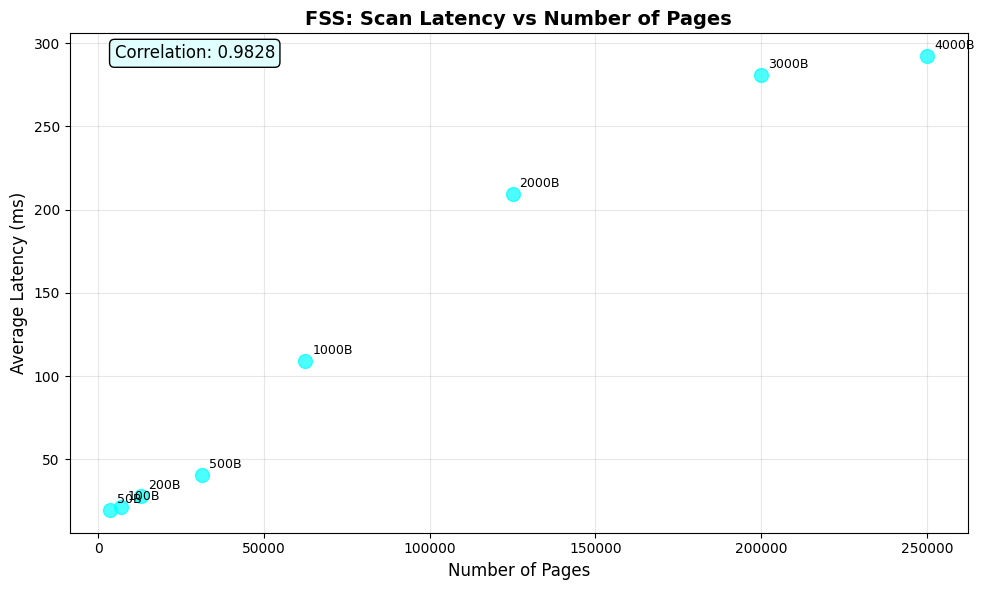

In [104]:
# FSS correlation analysis
plt.figure(figsize=(10, 6))
plt.scatter(fss_pages, fss_avg_latencies, c='cyan', s=100, alpha=0.7)
plt.xlabel('Number of Pages', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('FSS: Scan Latency vs Number of Pages', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add record size labels for each point
for rs, pages, lat in zip(fss_record_sizes, fss_pages, fss_avg_latencies):
    plt.annotate(f'{rs}B', (pages, lat), textcoords="offset points", 
                xytext=(5,5), ha='left', fontsize=9)

# Calculate and display correlation
if len(fss_pages) > 1:
    fss_correlation = np.corrcoef(fss_pages, fss_avg_latencies)[0, 1]
    plt.text(0.05, 0.95, f'Correlation: {fss_correlation:.4f}', 
             transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="lightcyan"))

plt.tight_layout()
plt.show()

# Four-Way Comparison: FBT vs HS vs APS vs FSS

This section compares the scan latency performance across all four access methods.

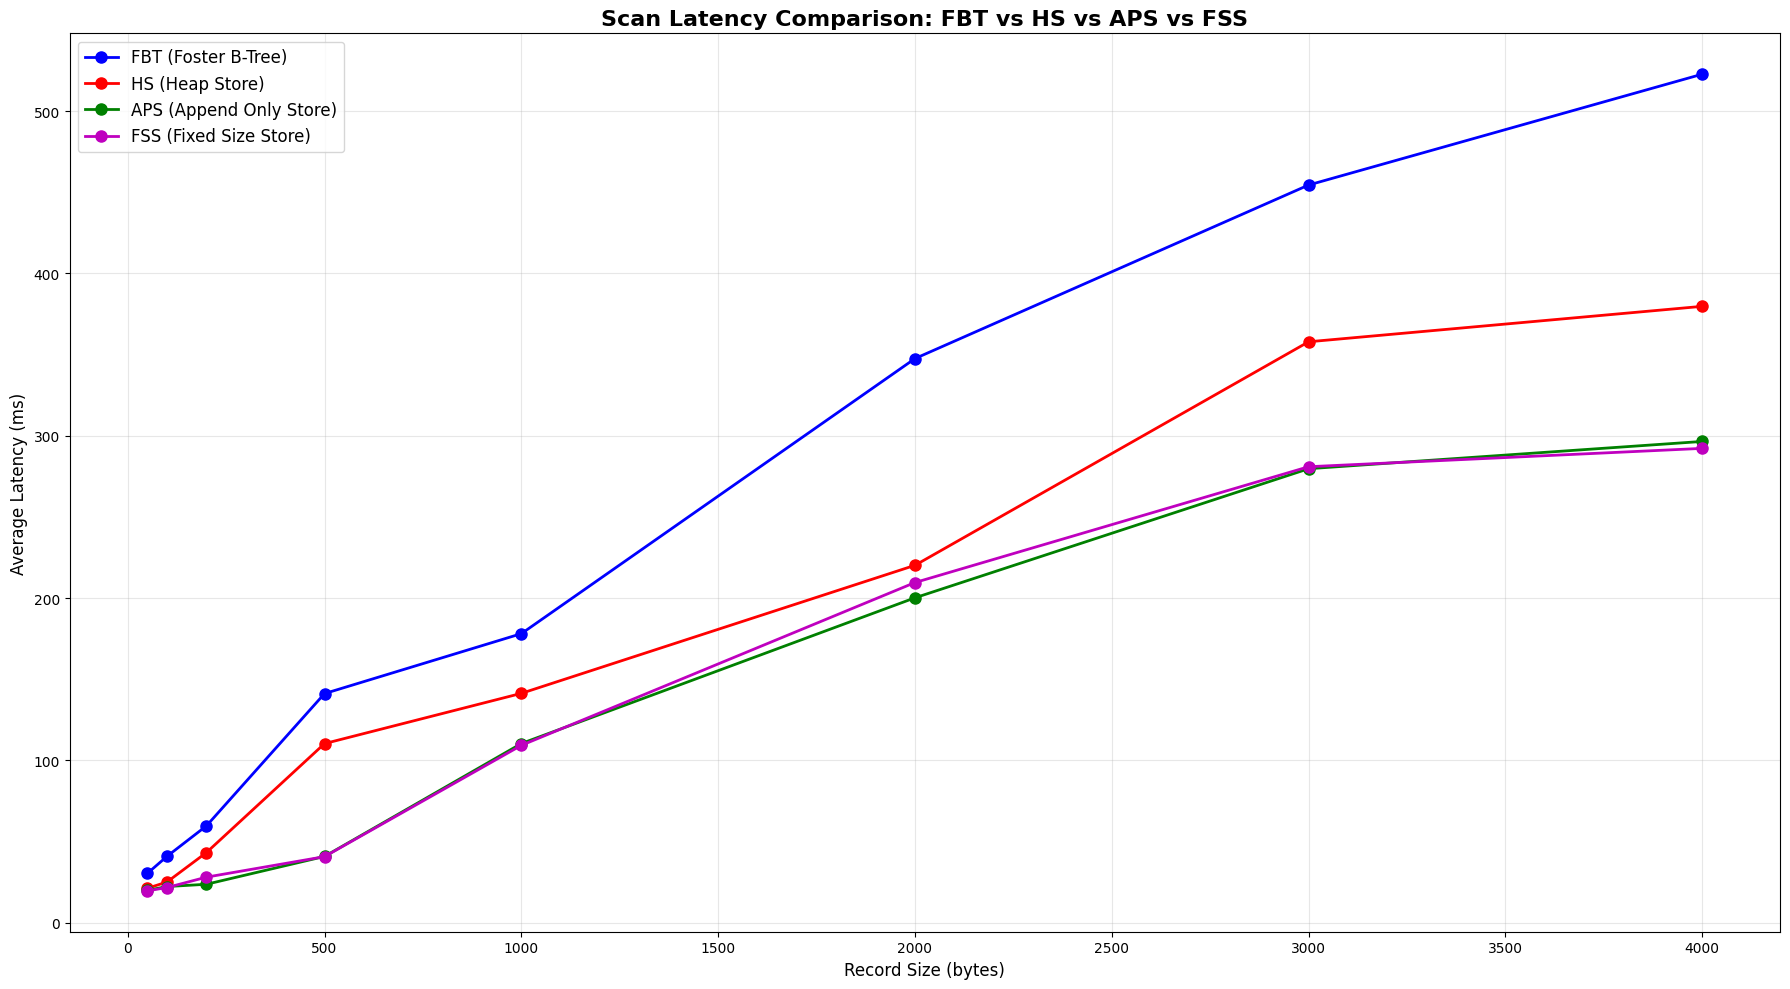

In [105]:
# Four-way scan latency comparison
plt.figure(figsize=(18, 10))
plt.plot(record_sizes, avg_latencies, 'bo-', linewidth=2, markersize=8, label='FBT (Foster B-Tree)')
plt.plot(hs_record_sizes, hs_avg_latencies, 'ro-', linewidth=2, markersize=8, label='HS (Heap Store)')
plt.plot(aps_record_sizes, aps_avg_latencies, 'go-', linewidth=2, markersize=8, label='APS (Append Only Store)')
plt.plot(fss_record_sizes, fss_avg_latencies, 'mo-', linewidth=2, markersize=8, label='FSS (Fixed Size Store)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Average Latency (ms)', fontsize=12)
plt.title('Scan Latency Comparison: FBT vs HS vs APS vs FSS', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

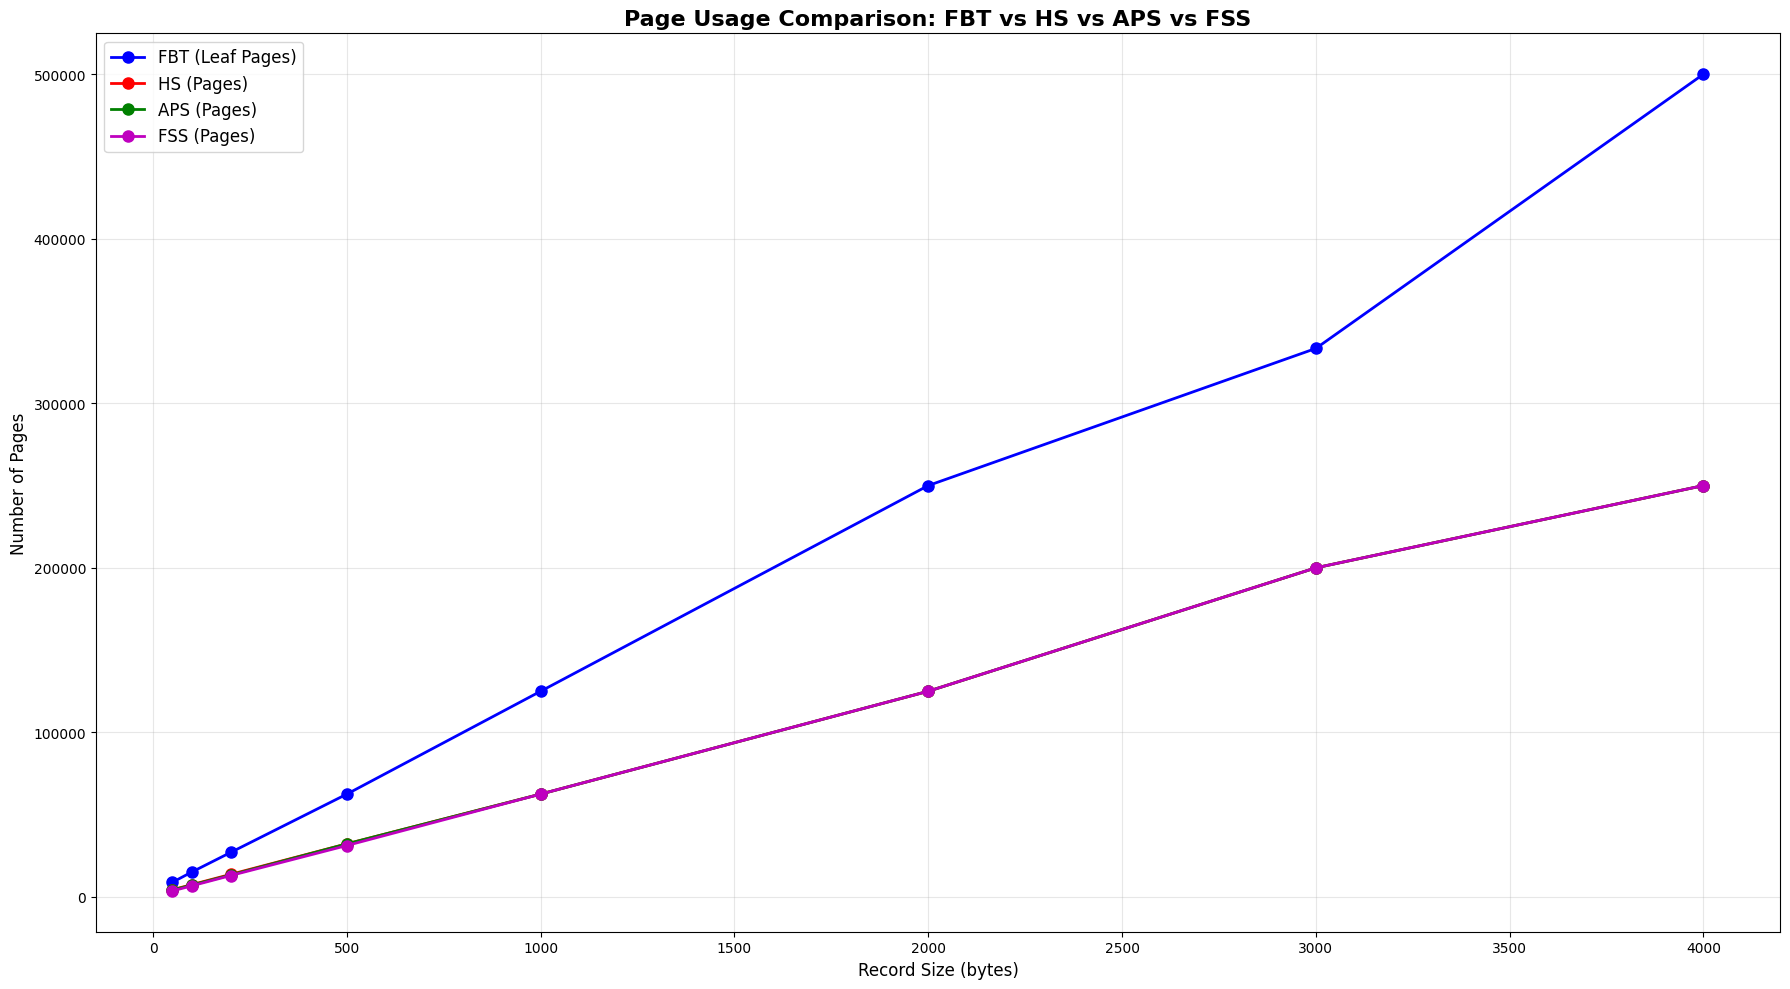

In [106]:
# Four-way page usage comparison
plt.figure(figsize=(18, 10))
plt.plot(record_sizes, leaf_pages, 'bo-', linewidth=2, markersize=8, label='FBT (Leaf Pages)')
plt.plot(hs_record_sizes, hs_pages, 'ro-', linewidth=2, markersize=8, label='HS (Pages)')
plt.plot(aps_record_sizes, aps_pages, 'go-', linewidth=2, markersize=8, label='APS (Pages)')
plt.plot(fss_record_sizes, fss_pages, 'mo-', linewidth=2, markersize=8, label='FSS (Pages)')
plt.xlabel('Record Size (bytes)', fontsize=12)
plt.ylabel('Number of Pages', fontsize=12)
plt.title('Page Usage Comparison: FBT vs HS vs APS vs FSS', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [107]:
# Comprehensive four-way performance comparison table
if data and hs_data and aps_data and fss_data:
    print("COMPREHENSIVE FOUR-WAY PERFORMANCE COMPARISON")
    print("="*120)
    print(f"{'Record Size':<12} {'FBT Latency':<12} {'HS Latency':<12} {'APS Latency':<12} {'FSS Latency':<12} {'Best':<8} {'Worst':<8}")
    print("-" * 120)
    
    # Find common record sizes across all four
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes) & set(fss_record_sizes)
    
    method_averages = []
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        fss_idx = fss_record_sizes.index(size)
        
        fbt_latency = avg_latencies[fbt_idx]
        hs_latency = hs_avg_latencies[hs_idx]
        aps_latency = aps_avg_latencies[aps_idx]
        fss_latency = fss_avg_latencies[fss_idx]
        
        latencies = [
            ('FBT', fbt_latency),
            ('HS', hs_latency), 
            ('APS', aps_latency),
            ('FSS', fss_latency)
        ]
        
        # Sort by latency to find best and worst
        latencies.sort(key=lambda x: x[1])
        best = latencies[0][0]
        worst = latencies[-1][0]
        
        print(f"{size:<12} {fbt_latency:<12.2f} {hs_latency:<12.2f} {aps_latency:<12.2f} {fss_latency:<12.2f} {best:<8} {worst:<8}")
    
    print("-" * 120)
    
    # Calculate average performance for each method
    methods = [
        ("FBT", [avg_latencies[record_sizes.index(size)] for size in common_sizes]),
        ("HS", [hs_avg_latencies[hs_record_sizes.index(size)] for size in common_sizes]),
        ("APS", [aps_avg_latencies[aps_record_sizes.index(size)] for size in common_sizes]),
        ("FSS", [fss_avg_latencies[fss_record_sizes.index(size)] for size in common_sizes])
    ]
    
    print(f"\nOVERALL PERFORMANCE RANKING (average latency across all record sizes):")
    method_ranking = [(name, np.mean(latencies)) for name, latencies in methods]
    method_ranking.sort(key=lambda x: x[1])
    
    for i, (method, avg_lat) in enumerate(method_ranking, 1):
        print(f"{i}. {method}: {avg_lat:.2f}ms average")
    
    # Performance ratios
    print(f"\nPERFORMANCE RATIOS (relative to best performer {method_ranking[0][0]}):")
    best_avg = method_ranking[0][1]
    for method, avg_lat in method_ranking:
        ratio = avg_lat / best_avg
        print(f"{method}: {ratio:.2f}x ({avg_lat:.2f}ms vs {best_avg:.2f}ms)")

COMPREHENSIVE FOUR-WAY PERFORMANCE COMPARISON
Record Size  FBT Latency  HS Latency   APS Latency  FSS Latency  Best     Worst   
------------------------------------------------------------------------------------------------------------------------
50           30.39        21.20        19.95        19.60        FSS      FBT     
100          40.92        25.11        22.27        21.68        FSS      FBT     
200          59.66        43.22        23.68        28.07        APS      FBT     
500          141.17       110.34       40.82        40.70        FSS      FBT     
1000         178.07       141.30       110.38       109.26       FSS      FBT     
2000         347.56       220.19       200.17       209.58       APS      FBT     
3000         454.48       357.90       279.69       280.92       APS      FBT     
4000         522.77       379.74       296.50       292.23       FSS      FBT     
--------------------------------------------------------------------------------------

In [108]:
# FSS summary statistics and correlations
if fss_data:
    print("FSS Summary Statistics:")
    print(f"Record size range: {min(fss_record_sizes)} - {max(fss_record_sizes)} bytes")
    print(f"Latency range: {min(fss_avg_latencies):.2f} - {max(fss_avg_latencies):.2f} ms")
    print(f"Pages range: {min(fss_pages)} - {max(fss_pages)} pages")
    print(f"Average latency: {np.mean(fss_avg_latencies):.2f} ms")
    print(f"Median latency: {np.median(fss_avg_latencies):.2f} ms")
    print(f"Average pages: {np.mean(fss_pages):.0f} pages")
    print(f"Median pages: {np.median(fss_pages):.0f} pages")
    
    # Calculate correlation coefficients
    if len(fss_data) > 1:
        fss_latency_recordsize_corr = np.corrcoef(fss_record_sizes, fss_avg_latencies)[0, 1]
        fss_pages_recordsize_corr = np.corrcoef(fss_record_sizes, fss_pages)[0, 1]
        fss_latency_pages_corr = np.corrcoef(fss_pages, fss_avg_latencies)[0, 1]
        
        print(f"\nFSS Correlations:")
        print(f"Latency vs Record Size: {fss_latency_recordsize_corr:.4f}")
        print(f"Pages vs Record Size: {fss_pages_recordsize_corr:.4f}")
        print(f"Latency vs Pages: {fss_latency_pages_corr:.4f}")

# Page usage efficiency across all four methods
if data and hs_data and aps_data and fss_data:
    print("\n" + "="*100)
    print("FOUR-WAY PAGE USAGE EFFICIENCY COMPARISON")
    print("="*100)
    print(f"{'Record Size':<12} {'FBT Pages':<12} {'HS Pages':<12} {'APS Pages':<12} {'FSS Pages':<12} {'Most Efficient'}")
    print("-" * 100)
    
    common_sizes = set(record_sizes) & set(hs_record_sizes) & set(aps_record_sizes) & set(fss_record_sizes)
    
    for size in sorted(common_sizes):
        fbt_idx = record_sizes.index(size)
        hs_idx = hs_record_sizes.index(size)
        aps_idx = aps_record_sizes.index(size)
        fss_idx = fss_record_sizes.index(size)
        
        fbt_pages_count = leaf_pages[fbt_idx]
        hs_pages_count = hs_pages[hs_idx]
        aps_pages_count = aps_pages[aps_idx]
        fss_pages_count = fss_pages[fss_idx]
        
        # Determine most page-efficient (fewest pages)
        page_counts = [
            ('FBT', fbt_pages_count),
            ('HS', hs_pages_count),
            ('APS', aps_pages_count),
            ('FSS', fss_pages_count)
        ]
        
        page_counts.sort(key=lambda x: x[1])
        most_efficient = page_counts[0][0]
        
        print(f"{size:<12} {fbt_pages_count:<12} {hs_pages_count:<12} {aps_pages_count:<12} {fss_pages_count:<12} {most_efficient}")
    
    print("-" * 100)

FSS Summary Statistics:
Record size range: 50 - 4000 bytes
Latency range: 19.60 - 292.23 ms
Pages range: 3678 - 250001 pages
Average latency: 125.26 ms
Median latency: 74.98 ms
Average pages: 86522 pages
Median pages: 46876 pages

FSS Correlations:
Latency vs Record Size: 0.9794
Pages vs Record Size: 0.9991
Latency vs Pages: 0.9828

FOUR-WAY PAGE USAGE EFFICIENCY COMPARISON
Record Size  FBT Pages    HS Pages     APS Pages    FSS Pages    Most Efficient
----------------------------------------------------------------------------------------------------
50           8928         4407         4168         3678         FSS
100          15151        7464         7248         6758         FSS
200          27027        13700        13335        12989        FSS
500          62500        32260        32260        31251        FSS
1000         125000       62501        62501        62501        HS
2000         249999       125001       125001       125001       HS
3000         333333       2000